<a href="https://colab.research.google.com/github/Maqar/DL/blob/main/Thesis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 4.3 MB/s 
     |████████████████████████████████| 3.3 MB 19.3 MB/s 
     |████████████████████████████████| 895 kB 73.0 MB/s 
     |████████████████████████████████| 636 kB 39.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import transformers

In [3]:
transformers.__version__

'4.9.2'

In [31]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import requests
from tqdm.auto import tqdm
from sklearn.metrics import classification_report

In [34]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, ViTModel

In [35]:
# transform = transforms.Compose(
#     [
#        transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     ])

# batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [37]:
feature_extractor = ViTFeatureExtractor.from_pretrained('nateraw/vit-base-patch16-224-cifar10', do_normalize=True, do_resize=True)
model = ViTForImageClassification.from_pretrained('nateraw/vit-base-patch16-224-cifar10', output_hidden_states = True)
model.eval();

In [38]:
model_feature = ViTModel.from_pretrained('nateraw/vit-base-patch16-224-cifar10')
model_feature.eval();

Some weights of the model checkpoint at nateraw/vit-base-patch16-224-cifar10 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at nateraw/vit-base-patch16-224-cifar10 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Check accuracy on test set

In [ ]:
pred = []
true = []

i = 0

with torch.no_grad(): 
    for x, y in tqdm(testset):
        true.append(y)
        model_input = feature_extractor(images=np.array(x), return_tensors="pt")
        output = model(**model_input)
        logits = output.logits
        predicted_class_idx = logits.argmax(-1).item()

        pred.append(predicted_class_idx)
        
        #i += 1
        
        #if i > 100:
            #break


In [ ]:
print(classification_report(true, pred))

In [40]:
image = trainset[0][0]
inputs = feature_extractor(images = np.array(image), return_tensors="pt")
model(**inputs)

SequenceClassifierOutput([('logits',
                           tensor([[-0.6710, -0.6855, -0.5796, -0.5894, -0.8287, -0.6458,  6.8239, -0.9257,
                                    -0.7635, -0.7494]], grad_fn=<AddmmBackward>)),
                          ('hidden_states',
                           (tensor([[[-0.0026,  0.0182, -0.4869,  ..., -0.0047, -0.0019, -0.7540],
                                     [ 0.0803, -0.1659,  0.2391,  ...,  0.0594, -0.0090, -1.0661],
                                     [ 0.0653,  0.0080,  0.0635,  ..., -0.0762,  0.0722, -0.8045],
                                     ...,
                                     [-0.1473, -0.0397, -0.3084,  ...,  0.1991,  0.2059, -0.7805],
                                     [-0.3810,  0.0714, -0.0418,  ...,  0.3861,  0.4964, -0.4968],
                                     [-0.1456,  0.0333,  0.2025,  ...,  0.0531, -0.0871, -0.6711]]],
                                   grad_fn=<AddBackward0>),
                            te

In [43]:
model_feature(**inputs)

BaseModelOutputWithPooling([('last_hidden_state',
                             tensor([[[-0.3708, -0.2789, -0.1058,  ..., -0.3603, -0.1558,  0.0855],
                                      [-0.3513, -0.3011,  0.0017,  ..., -0.3382, -0.0860, -0.0404],
                                      [-0.2621, -0.2884, -0.0289,  ..., -0.2778, -0.0823, -0.0367],
                                      ...,
                                      [-0.2145, -0.3224, -0.0583,  ..., -0.2367, -0.0540, -0.1377],
                                      [-0.3360, -0.5023,  0.0367,  ..., -0.2423,  0.1176, -0.1108],
                                      [-0.2595, -0.5120, -0.0131,  ..., -0.1832, -0.0807, -0.1151]]],
                                    grad_fn=<NativeLayerNormBackward>)),
                            ('pooler_output',
                             tensor([[-3.9799e-02, -1.5498e-01,  4.9423e-03, -5.3246e-02, -3.0668e-02,
                                       4.7905e-02, -1.1915e-02, -6.5058e-03, -1.600

In [ ]:
airplane = [] 
automobile = []  
bird = []  
cat = []  
deer = []  
dog = []  
frog = []
horse = [] 
ship = []  
truck = [] 
ai, au, b, c, de, do, f, h, s, t = 0,0,0,0,0,0,0,0,0,0

with torch.no_grad():
    for i in range(len(trainset)):
         if trainset[i][1] == 0:

            image = trainset[i][0]
            inputs = feature_extractor(images = np.array(image), return_tensors="pt")
            y = model_feature(**inputs)

            if ai == 0:
                airplane = y[1][0]
            else:
                airplane += y[1][0]
            ai += 1
            print(ai)

'''        elif trainset[i][1] == 1:
            if au == 0:
                automobile = y[1][0]
            else:
                automobile += y[1][0]
            au += 1

        elif trainset[i][1] == 2:
            if b == 0:
                bird = y[1][0]
            else:
                bird += y[1][0]
            b += 1

        elif trainset[i][1] == 3:
            if c == 0:
                cat = y[1][0]
            else:
                cat += y[1][0]
            c += 1

        elif trainset[i][1] == 4:
            if de == 0:
                deer = y[1][0]
            else:
                deer += y[1][0]
            de += 1

        elif trainset[i][1] == 5:
            if do == 0:
                dog = y[1][0]
            else:
                dog += y[1][0]
            do += 1

        elif trainset[i][1] == 6:
            if f == 0:
                frog = y[1][0]
            else:
                frog += y[1][0]
            f += 1

        elif trainset[i][1] == 7:
            if h == 0:
                horse = y[1][0]
            else:
                horse += y[1][0]
            h += 1

        elif trainset[i][1] == 8:
            if s == 0:
                ship = y[1][0]
            else:
                ship += y[1][0]
            s += 1

        elif trainset[i][1] == 9:
            if t == 0:
                truck = y[1][0]
            else:
                truck += y[1][0]
            t += 1 '''


In [ ]:
airplane/5000

In [ ]:
#Создание матрицы смежности и графа

In [12]:
from scipy.spatial import distance
import numpy as np

In [ ]:
with open('CIF10_vec.txt') as f:
  data = f.read()
  print(data)


In [10]:
LIST = [[ 1.5028e-01, -1.4364e-01,  2.8966e-01,  5.3082e-02,  9.5124e-02, 6.5327e-03, -7.6156e-03, -4.5164e-02, -1.1354e-01,  1.6689e-01,
         2.8270e-01,  2.5454e-02, -4.8530e-02,  3.2134e-02,  7.5551e-04,
         1.9190e-01, -2.0185e-01, -2.2004e-02,  7.1686e-02, -1.5049e-01,
         2.4846e-01, -9.8575e-02, -2.4050e-01, -1.2257e-01,  7.7313e-02,
         2.4549e-01,  2.1164e-01,  1.7365e-02,  1.2007e-01, -1.0284e-02,
        -6.3709e-02,  2.3084e-01, -1.3338e-01,  7.6670e-02,  1.4804e-01,
        -4.5694e-02,  8.2394e-02,  1.6998e-01,  1.2322e-01,  5.5501e-02,
         3.8924e-02, -2.1863e-02,  3.1062e-02,  1.6281e-01,  1.4400e-01,
         1.6929e-01, -2.0444e-02,  1.8213e-01, -9.4518e-02, -2.7381e-02,
        -7.3829e-02, -4.2798e-02,  7.9117e-02,  6.5438e-02, -1.7230e-01,
         6.2662e-02,  1.9698e-01,  2.1518e-02,  1.2077e-03,  6.2180e-02,
        -2.6827e-01,  6.4638e-02, -7.7085e-02, -1.4451e-01,  7.4408e-02,
        -3.3820e-02,  6.0294e-02, -1.9997e-01, -4.6277e-02, -1.8486e-01,
        -1.4243e-02,  1.2331e-01,  7.0706e-02,  8.2789e-02,  1.2609e-01,
         6.5016e-02,  5.5693e-02, -2.1900e-01,  1.3649e-01,  2.2132e-01,
         2.3366e-01,  2.1000e-01, -1.4022e-01,  2.3628e-01,  2.4801e-01,
         3.9924e-02,  7.4026e-02,  2.0043e-01,  8.0477e-02, -1.9577e-01,
        -2.8116e-01, -4.3113e-02,  1.3512e-01, -2.7329e-02,  5.7168e-02,
        -3.5538e-02, -1.1597e-01,  1.0064e-02,  2.4629e-02,  1.1250e-01,
         1.7586e-02,  5.5289e-02, -1.4758e-02,  9.4922e-02, -1.1776e-02,
        -1.2204e-01, -1.3588e-01,  2.5723e-01,  2.0306e-01, -1.2859e-02,
         1.9929e-01,  1.3317e-01, -1.1096e-02,  1.0242e-01, -5.9510e-02,
        -2.4398e-01, -2.8002e-01, -4.5604e-03, -6.0044e-02, -1.0488e-01,
        -1.2363e-01, -1.1345e-01, -1.8798e-01,  1.3392e-01,  1.7011e-01,
         3.1565e-02,  7.4153e-02,  2.2636e-02, -8.1639e-02, -1.4062e-01,
        -8.8877e-02, -4.6816e-02,  7.2236e-02, -7.9367e-02,  5.8641e-02,
         2.0287e-03, -1.0390e-01, -1.5203e-01, -8.3190e-02,  2.1917e-02,
         6.5592e-02, -1.9110e-01,  7.3839e-04,  7.4141e-02, -5.3058e-02,
        -1.4676e-01,  8.8900e-02, -3.7627e-03, -7.3756e-02, -1.4765e-02,
         6.3386e-03,  3.4272e-02, -1.4495e-01, -1.1339e-01,  2.1058e-02,
        -1.8077e-01,  1.7921e-01, -1.2483e-01,  1.4193e-01,  3.6136e-02,
        -1.4684e-01, -1.5630e-01, -2.3062e-01,  1.1155e-01, -2.3942e-03,
         1.0074e-01,  1.0792e-01, -1.4419e-01,  1.0483e-01,  3.1766e-02,
        -2.5554e-01,  7.4943e-02, -1.0173e-01,  6.7626e-02,  2.1386e-01,
         1.5600e-01, -1.6613e-01, -6.1977e-02,  3.7348e-02,  3.1424e-01,
         8.1736e-02, -7.5021e-02,  2.0048e-01, -2.5602e-02, -6.9299e-02,
         1.9314e-01,  1.1413e-01, -1.0694e-01, -1.3478e-01,  1.6604e-02,
         1.8541e-01,  1.9862e-01, -3.0927e-02, -2.9005e-02,  1.8734e-01,
        -2.0735e-01,  1.3334e-01, -2.3793e-01,  5.9061e-02, -2.7146e-01,
         3.9652e-03, -1.6465e-01,  1.5186e-01, -7.0866e-02,  1.5269e-01,
         1.8331e-01, -8.3493e-02, -1.3565e-01, -9.8141e-02,  2.5877e-01,
         8.1028e-02,  5.5402e-02, -2.2050e-01,  9.6430e-02,  8.5417e-02,
         1.3762e-03, -4.0955e-03, -7.9831e-03, -3.1691e-02,  8.2547e-02,
         1.2104e-01,  5.1455e-02,  3.0646e-02, -1.0578e-01, -2.5809e-01,
         8.1985e-02,  1.2289e-02,  1.3198e-02, -7.8012e-03,  2.4553e-02,
         1.5920e-01,  1.1139e-01, -7.6725e-02, -3.3446e-02, -8.4240e-02,
         2.4304e-01, -3.3515e-02, -1.4346e-01,  1.9204e-03, -6.1748e-02,
        -1.1918e-02,  1.2348e-02, -1.0948e-01, -9.8591e-02, -1.7591e-01,
        -3.3059e-01,  2.6843e-01,  3.6582e-02, -4.2640e-02, -9.3552e-02,
         1.1765e-01,  1.0862e-01, -5.0032e-02, -1.5002e-01,  3.2765e-01,
         8.4203e-02, -6.1785e-02,  6.0566e-03, -8.4731e-02, -7.8078e-02,
         2.1030e-01, -2.5108e-02,  1.9707e-01,  6.7877e-02,  4.1463e-01,
         1.3143e-01,  5.3153e-02,  7.9031e-02, -1.7174e-01, -2.4267e-02,
         1.1104e-01,  4.7386e-02, -6.9283e-02, -3.2767e-02, -7.2037e-02,
        -7.8404e-02,  2.4159e-02, -1.0133e-02,  1.7614e-02,  4.3983e-03,
        -4.5489e-02, -2.9160e-01,  9.5271e-02,  1.2029e-01,  8.1387e-02,
        -1.3058e-01, -1.7045e-02,  1.0521e-01,  3.1066e-02, -1.6315e-01,
         2.0199e-01, -1.1627e-02,  2.6085e-01,  3.4615e-01,  6.4794e-02,
        -2.2857e-02, -5.6743e-02,  4.5934e-02,  2.1038e-01, -2.7410e-01,
         1.0761e-01,  1.5553e-01,  8.6643e-02,  2.2292e-02, -3.7808e-02,
         1.5124e-02, -5.9714e-02, -1.0318e-01, -3.1199e-01, -3.0588e-02,
        -2.4292e-01, -6.6383e-02,  7.4254e-02, -9.1488e-02, -4.2800e-03,
        -2.3450e-01, -6.1050e-02, -2.1653e-01, -1.0062e-01,  1.7782e-01,
        -2.4063e-02, -1.9465e-01,  4.6348e-02,  2.5023e-02,  4.0217e-02,
         1.2817e-01,  3.9096e-02, -1.4386e-02,  7.1813e-02,  6.3736e-02,
        -1.1759e-01,  2.9497e-03,  3.3358e-01, -1.2055e-01,  5.4687e-02,
         4.6936e-02,  6.0136e-02, -1.8097e-03,  5.3246e-02,  4.8268e-03,
        -3.8944e-02, -1.9551e-02, -2.4179e-01,  5.5423e-02,  9.3472e-02,
         2.5148e-02, -2.8621e-01, -2.5174e-01,  7.9171e-02, -8.9810e-02,
        -7.4821e-02, -6.4117e-02, -2.1048e-01, -1.2300e-01,  2.0259e-01,
        -1.0409e-02, -2.4017e-01, -8.4172e-02, -7.0211e-02, -3.6858e-03,
         1.0526e-01,  1.5924e-02, -4.4377e-03,  3.9179e-04, -6.6953e-02,
         1.5158e-01, -1.0548e-02, -9.8358e-02,  8.9156e-02, -2.9142e-02,
        -4.2338e-03,  2.1417e-01, -2.4111e-01, -1.4978e-01,  4.1410e-02,
        -2.6474e-01, -7.7579e-02,  1.3360e-01,  3.7168e-02,  3.6084e-01,
         9.2153e-02, -2.9521e-01,  1.1719e-01,  4.3201e-02,  1.1911e-01,
         1.2123e-01,  9.2143e-02,  6.5290e-02, -9.0522e-03,  7.6499e-02,
         8.5946e-02, -1.2673e-01,  1.4545e-01,  7.2326e-02, -9.2191e-02,
        -2.3398e-01, -8.4414e-02,  2.7363e-01,  4.1768e-02,  1.9535e-01,
         3.0943e-02, -5.2287e-03, -3.6577e-02,  3.4613e-01, -6.4186e-02,
        -4.2219e-02,  1.5051e-01, -1.7811e-04,  5.9586e-03, -7.2410e-02,
        -2.3238e-02, -1.1286e-01, -1.4568e-01,  6.0750e-02, -1.4618e-01,
        -2.4160e-01, -6.0722e-03,  1.2805e-01, -2.2381e-01,  1.6225e-01,
         6.7594e-02, -4.0917e-02, -3.7890e-02, -1.7180e-01,  3.3552e-02,
        -9.6898e-02,  1.3800e-01,  1.2043e-01,  7.3816e-02,  1.0124e-02,
         1.0030e-01, -1.2193e-02,  5.0298e-02,  8.7565e-03,  1.7315e-01,
         1.0600e-01, -2.5892e-02,  1.7494e-02, -1.0817e-01, -1.7594e-01,
        -3.3198e-01, -4.6167e-02, -3.2968e-02,  1.6101e-02, -8.2741e-02,
        -9.0447e-04, -9.0685e-02, -6.6125e-02, -2.3068e-02,  6.2096e-02,
         5.2464e-02, -2.6518e-02, -1.9313e-01,  1.9800e-01, -2.4285e-01,
        -2.7349e-01,  1.7788e-01,  6.3232e-02, -1.2691e-02,  2.7441e-01,
         2.4908e-01, -2.8491e-02,  9.5407e-02,  5.9574e-02,  6.4354e-02,
        -2.0437e-01,  1.6876e-01, -1.2543e-01, -6.4560e-02,  6.9866e-03,
         7.5151e-03,  4.0362e-02,  5.9529e-03, -9.6879e-02, -3.3482e-02,
         2.5914e-01,  1.6300e-01, -1.5480e-01,  1.0211e-01, -1.0765e-01,
        -8.1053e-02, -4.6338e-02, -2.4446e-01, -4.6276e-02,  6.0301e-02,
        -9.2140e-02, -1.1055e-02, -3.3738e-02, -1.9024e-01,  2.2184e-01,
         6.9115e-03, -6.0295e-02, -9.2004e-02,  5.3921e-02,  1.2130e-01,
         1.8851e-01, -7.1448e-02, -6.3721e-03,  7.4498e-02, -1.6764e-02,
         3.7254e-02, -1.1029e-01,  9.0559e-02,  9.8494e-02, -2.3870e-01,
        -1.4574e-01,  1.8714e-02,  5.8295e-02, -1.4593e-01,  5.4982e-02,
         1.6668e-02,  7.9930e-02, -8.1809e-02, -8.6714e-02,  3.4466e-02,
         1.4479e-01, -1.8403e-01,  1.8981e-01, -1.1275e-02, -3.1609e-02,
        -4.0954e-03,  9.3983e-02,  2.8422e-01,  3.6619e-01,  4.4828e-02,
        -1.2381e-01, -1.4761e-01,  8.0262e-02,  8.2146e-02,  1.3578e-01,
        -3.0767e-01, -4.9825e-02,  1.8375e-01,  5.6895e-02, -1.1183e-02,
        -5.3375e-02,  1.5323e-01, -1.4671e-01, -1.9839e-01, -1.4721e-01,
         1.1372e-01, -7.3639e-03, -9.9043e-02, -2.1673e-01,  1.2792e-02,
         3.7080e-02,  1.8637e-01,  1.6019e-02, -5.9689e-02, -2.7568e-04,
         1.4965e-02,  3.5533e-01,  4.7346e-02,  6.3331e-02,  2.4308e-01,
         4.4070e-03, -8.0575e-02,  1.2416e-01,  1.2389e-01,  1.2660e-02,
         9.3835e-02,  1.6385e-02, -7.5818e-03,  4.3308e-02, -9.3069e-02,
         4.8513e-02,  1.1130e-02, -2.8962e-02, -3.1423e-01, -4.9722e-02,
         1.1147e-01,  6.4271e-02, -7.2180e-02,  6.7911e-02, -4.4937e-02,
        -5.4177e-02,  4.6875e-03,  6.9490e-02,  1.8118e-01, -8.1375e-02,
         1.3619e-01, -1.8742e-02, -9.3315e-02,  1.7798e-01, -8.3215e-02,
        -5.9652e-03,  6.6424e-02, -1.2495e-01,  1.5133e-02,  4.8471e-02,
         1.1953e-01, -1.3350e-01,  8.5384e-02, -2.7448e-02, -4.2726e-02,
        -2.4319e-01, -1.6962e-01,  7.1097e-02, -4.0788e-02,  1.2029e-01,
        -5.8993e-02,  1.6792e-01,  1.3204e-01,  1.8653e-01,  1.2010e-01,
        -2.1403e-02,  1.6410e-01,  2.7859e-01, -8.5979e-03, -4.7054e-02,
         5.7293e-02, -1.0085e-01,  7.0980e-02,  1.8966e-02, -2.7169e-01,
         1.1324e-01, -4.0865e-02, -7.7266e-02,  1.4532e-01,  9.8858e-02,
        -6.2089e-02,  4.6585e-02, -1.8587e-01,  4.1379e-03, -4.4469e-02,
         1.8867e-01, -9.3289e-02,  1.1809e-01,  1.4499e-01,  2.3264e-02,
         2.3102e-01,  1.3226e-01, -6.4348e-02,  4.7204e-02, -8.5705e-02,
        -6.3504e-03, -2.8468e-01, -1.6301e-01, -4.3829e-03,  1.8984e-01,
         3.7699e-02,  2.2081e-01,  9.0815e-02,  1.9488e-01,  1.3079e-01,
        -8.9971e-03, -1.5140e-01, -3.3753e-02, -1.6892e-02, -7.9457e-02,
        -2.6382e-02,  6.0257e-03, -2.1309e-02, -4.2627e-02,  4.3755e-02,
        -7.8394e-02,  3.0887e-02, -5.7853e-03,  5.7513e-02, -6.0710e-02,
         4.4566e-02, -1.3810e-01, -9.6291e-02, -8.9755e-02,  5.8901e-02,
         1.7202e-01,  6.6565e-02, -6.9728e-02,  1.2269e-01,  4.0206e-02,
        -2.4914e-01,  8.8667e-02,  1.3625e-01,  1.2786e-01, -3.7352e-01,
         6.4288e-02, -2.8693e-02, -8.2905e-02, -7.5404e-02, -1.7984e-01,
         1.4431e-01, -5.3421e-02, -1.1795e-02, -9.1202e-02, -1.5627e-02,
        -9.6013e-02,  1.6570e-01,  1.4857e-01, -1.1428e-01, -6.7936e-02,
         1.8453e-01, -2.1422e-01,  8.7227e-02, -2.5307e-02,  2.4675e-01,
         1.2931e-01,  4.2681e-01,  1.1993e-01, -8.3296e-02,  1.3081e-01,
        -1.3256e-01,  1.8080e-01, -2.2289e-01, -7.8286e-02,  1.0903e-01,
        -1.0130e-01, -1.0730e-01,  1.1295e-01,  1.2755e-01, -1.8888e-02,
        -1.4156e-01,  3.1529e-01,  1.4546e-01, -2.8618e-01,  3.5685e-02,
         1.0005e-02,  1.2177e-01, -5.7798e-02, -2.3446e-02,  5.8949e-02,
        -8.1844e-02,  3.0171e-01, -1.7935e-02,  1.3771e-01, -1.5157e-01,
        -1.8342e-01,  9.4718e-02, -5.7156e-02, -1.9368e-01, -1.4504e-01,
         4.5167e-02,  2.3085e-01, -7.9898e-02,  1.7713e-02, -1.1277e-01,
        -3.6229e-02, -1.5154e-01,  1.4939e-01,  2.1816e-01, -6.8608e-02,
         1.6271e-01, -3.7687e-02, -1.3797e-01,  2.5077e-02,  8.1098e-02,
         1.6051e-01, -5.9779e-02, -2.8798e-02, -8.5860e-02,  3.7995e-02,
        -1.2121e-01,  2.3507e-01, -2.5568e-01, -7.9719e-02, -3.4555e-02,
        -7.9484e-03,  2.2428e-03, -1.2274e-01,  3.2477e-02, -1.5829e-01,
        -4.1977e-02, -1.3968e-01,  1.9264e-01,  1.2261e-01, -2.0324e-02,
         2.3782e-02, -1.6415e-01, -1.6569e-01],
[-1.0291e-01,  8.6152e-03, -4.1856e-02, -3.2010e-02,  3.7503e-02,
        -2.1634e-01,  2.0924e-01, -3.1092e-02,  7.8969e-02,  1.3446e-01,
         9.5706e-02,  7.9414e-02, -6.5425e-03,  8.3531e-02, -3.7488e-01,
         1.6768e-01, -2.1214e-01,  1.6663e-01,  2.9480e-02,  1.5267e-01,
        -1.2038e-02, -2.4420e-01, -1.0907e-01, -1.9222e-01, -1.5304e-01,
        -2.1439e-01, -5.1936e-03,  1.8500e-01,  3.5154e-02,  4.1881e-02,
         8.3984e-02,  6.7124e-02, -7.7500e-02, -1.2803e-01, -6.2972e-02,
         1.0942e-02, -3.5448e-01, -3.8721e-02,  3.7755e-02,  9.1619e-02,
        -1.1678e-01,  9.8188e-02,  5.1868e-02, -2.6047e-02,  1.7880e-01,
        -1.0033e-01,  3.1235e-02,  2.0346e-01,  2.3451e-01, -1.2482e-01,
         2.4853e-02,  3.0419e-02,  8.1335e-02, -1.1794e-01,  4.8109e-02,
        -4.3344e-02,  1.6479e-01,  1.0505e-01, -1.9032e-02,  1.5258e-02,
         7.7977e-02,  9.9100e-02, -1.7366e-01, -1.2592e-01, -2.1429e-01,
         1.0539e-01,  2.7423e-02, -1.2489e-02,  2.2589e-01,  1.5112e-02,
         1.0585e-01,  7.1736e-02, -2.6819e-02, -6.5068e-02, -1.8632e-01,
        -5.5610e-02, -6.9765e-02, -2.1923e-01, -4.5688e-02,  3.0195e-02,
         1.7500e-01,  6.1895e-03,  1.2232e-01, -9.4966e-02, -5.6950e-02,
         1.9412e-01, -8.6458e-02, -1.0364e-01, -9.9833e-02, -4.2518e-02,
        -2.4090e-02,  2.0351e-01, -1.2553e-02, -5.7154e-02,  1.2570e-01,
        -3.5376e-03,  3.4463e-02,  1.7238e-01,  8.2751e-02, -1.2263e-02,
        -3.2670e-02, -1.3068e-01,  1.3792e-02, -2.3689e-01, -8.7014e-02,
         1.2051e-01, -4.2905e-02, -4.2596e-02,  1.5334e-01,  6.4283e-02,
         9.0267e-02,  2.0751e-01,  3.7482e-02, -8.9260e-02,  7.3644e-02,
        -6.6215e-02, -1.4630e-01,  7.5390e-02, -5.9248e-02, -1.3440e-01,
        -4.5796e-02, -2.3594e-02,  1.4315e-01, -1.2529e-01, -1.0957e-01,
         1.6172e-01, -5.6435e-04,  3.4175e-02,  2.6783e-02,  2.7317e-02,
        -1.1530e-01, -1.7643e-01,  1.9378e-01, -2.2625e-01, -3.2021e-02,
        -2.1712e-01,  5.5148e-02, -4.4740e-02,  3.6296e-02,  4.1793e-02,
        -1.3959e-02,  5.3189e-02,  7.4464e-02, -3.4736e-01, -1.2846e-01,
        -2.1107e-01, -2.4922e-01,  3.0098e-01, -7.0142e-02,  8.2623e-02,
         1.0997e-01,  8.9075e-02, -1.9418e-01,  7.4601e-02,  1.2102e-01,
         1.6931e-01,  1.0217e-01,  2.3254e-01,  1.9315e-01,  9.1843e-02,
        -2.8140e-02,  1.2279e-02, -1.6163e-01,  2.5275e-02, -1.2732e-01,
        -1.1830e-01,  1.7277e-01, -1.8843e-01, -1.1227e-01,  2.0915e-02,
        -2.4422e-02,  2.4499e-01,  2.1422e-01,  3.3795e-01, -6.4199e-02,
         3.7272e-02,  1.1352e-01, -1.0979e-01,  2.9408e-04, -3.1882e-02,
        -1.8642e-02, -1.9536e-01,  2.2112e-01, -1.9309e-01,  1.7634e-01,
        -1.8461e-01, -3.1151e-01, -1.9155e-01,  1.0462e-01, -1.5098e-02,
         9.0356e-03,  1.5507e-01, -6.8136e-02,  2.1494e-01,  9.6462e-02,
        -1.1395e-01, -6.2726e-02,  6.0475e-02, -9.5846e-02,  1.4163e-01,
         1.8969e-01,  1.1702e-01,  1.0554e-02,  2.5540e-03,  8.9157e-02,
        -1.8385e-01,  8.5153e-02, -1.0475e-01, -1.0563e-01, -8.2616e-02,
         3.4276e-01, -2.3032e-02, -2.8960e-03, -2.1819e-01, -2.3707e-01,
        -4.5162e-02, -3.0152e-02,  3.0202e-02,  6.0318e-02, -1.1241e-01,
         2.1880e-01,  2.1223e-02, -6.2657e-02, -7.1440e-02, -2.4564e-02,
        -1.1056e-01,  1.2205e-01, -2.0806e-01,  2.3139e-01, -1.5845e-01,
         1.0724e-01,  1.1035e-01, -3.7283e-02,  1.5082e-01, -1.2585e-02,
        -5.4185e-02,  2.6141e-01,  9.8219e-02,  9.1044e-02,  1.8116e-01,
         4.1633e-03, -4.6848e-02, -6.9022e-02,  1.9590e-01,  1.0493e-01,
         1.5571e-01,  5.4286e-02, -2.3522e-01,  4.3870e-03, -2.4379e-01,
        -2.7129e-01,  2.3017e-02, -5.0078e-02, -7.1214e-02, -3.6227e-02,
        -1.0875e-01,  1.4756e-01,  4.6588e-02,  8.9150e-02,  7.2688e-02,
        -2.5896e-02, -5.3726e-03,  2.1043e-01,  4.5899e-02, -3.2000e-01,
         1.1021e-01,  1.2447e-01, -1.4656e-01,  1.5028e-02, -5.1158e-02,
        -3.1210e-02, -9.5651e-02,  9.5107e-03,  1.1903e-01,  4.1786e-02,
        -1.7755e-01, -1.8892e-02, -8.0443e-02, -7.3208e-03, -4.3107e-02,
        -2.7075e-01, -3.2270e-02, -3.2682e-02,  3.8500e-02,  1.1176e-01,
        -1.2610e-01, -6.2195e-02,  1.8977e-01, -1.6131e-01, -5.4580e-02,
         6.3768e-02,  2.8083e-01, -4.5311e-02, -3.4815e-03, -2.4029e-01,
         1.1855e-01, -4.6730e-02,  1.4786e-01,  2.6138e-02,  6.4981e-02,
         1.2256e-01, -6.1462e-02,  1.2473e-01, -8.9964e-02, -1.5517e-01,
         7.1929e-02, -1.1289e-01,  1.1612e-01,  9.6812e-03, -9.1028e-03,
        -7.4902e-02, -1.5075e-01, -7.9673e-02,  1.0132e-01,  2.1789e-01,
        -1.6205e-01, -9.9945e-02, -1.7400e-01, -7.7474e-02, -1.2115e-01,
         1.3386e-01,  6.4168e-02, -3.3724e-02, -1.4732e-01,  1.1151e-01,
         5.9930e-02, -1.4414e-01,  1.0095e-01,  1.8939e-01, -1.5815e-01,
         2.3570e-01,  3.3035e-02, -1.4691e-01,  1.3142e-01,  3.7401e-02,
        -6.9698e-02, -1.9446e-01,  2.4111e-01, -4.2943e-02, -6.1884e-02,
        -1.3841e-01,  1.3928e-02,  1.2500e-01, -1.5801e-02,  8.2700e-02,
        -1.0767e-01, -1.0084e-01,  1.5306e-02,  7.1764e-02,  3.6753e-02,
         4.8127e-03, -5.0566e-02, -8.8640e-02,  1.1265e-01, -2.0713e-01,
        -1.1872e-01, -4.7195e-02,  2.8254e-02,  3.3314e-01, -6.5694e-03,
        -3.4906e-02, -1.0932e-01,  8.4702e-02, -1.9033e-01, -3.6014e-02,
        -1.6363e-01, -1.2635e-01, -3.0708e-01,  1.7944e-01, -2.9122e-02,
         1.1379e-03,  5.8978e-02, -7.3882e-02, -7.2546e-02, -1.1060e-02,
         4.3795e-03, -5.1546e-02, -7.0035e-02,  7.2446e-03,  1.3281e-01,
         7.6464e-02,  8.2672e-02, -1.2686e-01, -1.8942e-01,  1.3242e-01,
        -3.7849e-03, -4.5221e-02, -1.1759e-01, -5.8976e-02,  3.8759e-02,
        -1.3773e-01, -1.8701e-01, -9.4007e-02,  2.2765e-02, -1.0538e-01,
         1.1251e-03, -1.0655e-01,  5.4588e-02, -1.3553e-01, -3.4741e-01,
         7.4226e-02, -2.4625e-02,  4.3164e-02, -3.0859e-02, -7.2143e-02,
        -8.7552e-02,  1.7014e-01,  9.5137e-02,  2.1278e-01, -5.7555e-02,
         2.6674e-01,  1.9277e-01, -9.2150e-02,  5.3937e-02,  1.6475e-02,
        -3.3917e-02, -1.3713e-01, -3.0300e-02,  1.2293e-02, -1.7601e-01,
        -4.5298e-02, -9.6854e-03, -7.2347e-02, -1.1096e-01,  1.8411e-02,
        -2.1426e-01,  7.2483e-02,  5.0406e-02,  3.4706e-01, -2.0041e-01,
        -1.5554e-01, -1.1012e-01,  1.3582e-01,  9.0337e-02, -1.5331e-01,
         6.7567e-02, -1.2855e-01,  1.7774e-02,  4.6078e-02,  1.6540e-01,
        -2.4103e-01,  2.9883e-01, -1.2619e-02, -2.1261e-01, -1.3971e-02,
        -1.5751e-01,  4.5481e-02, -3.1054e-01, -1.1932e-02, -2.3166e-02,
         1.1383e-01,  3.0040e-02,  4.8013e-02, -3.2407e-02,  6.4824e-02,
        -3.7564e-01, -5.1861e-02, -4.4249e-02,  1.1910e-01,  1.7299e-01,
        -6.9080e-02,  1.0622e-01, -1.4477e-01, -1.3066e-01,  3.2186e-01,
        -1.7865e-01, -4.1846e-02,  1.3267e-01, -1.5869e-01,  1.1980e-01,
        -3.3506e-02,  1.0764e-01,  2.9320e-02, -1.1611e-01, -2.1594e-01,
        -1.0118e-01,  1.1431e-01, -1.0631e-01, -3.7005e-02, -1.9759e-01,
         9.7712e-02,  1.1672e-01,  2.2098e-01,  1.7030e-01, -2.7946e-02,
         3.0012e-02, -4.0924e-02,  6.5867e-02,  6.3056e-02,  2.5642e-01,
         1.8583e-01,  4.6597e-02, -8.2866e-02,  7.2673e-02,  2.7536e-01,
         5.8268e-02, -1.2484e-01, -6.3326e-02,  7.9369e-02, -8.4109e-02,
        -5.9981e-02,  1.3961e-01, -1.3179e-01, -6.9708e-03,  1.5052e-01,
        -5.1301e-02, -5.5238e-02, -9.5339e-02, -3.6479e-02, -1.3004e-01,
         1.4116e-01, -2.1872e-02, -3.2555e-01,  1.3170e-01, -1.1793e-01,
        -8.9798e-02,  5.7662e-02, -2.1938e-01, -1.6707e-02,  2.0799e-02,
         7.2552e-02,  4.4401e-02, -1.2169e-01,  2.5945e-02,  3.2291e-01,
         1.6177e-01,  1.9635e-01, -1.2070e-01, -7.5661e-02, -7.7861e-02,
         2.4202e-01, -5.6323e-02,  9.8691e-02,  1.0375e-02, -1.3027e-02,
        -1.5649e-01, -6.7003e-02, -3.0149e-02, -6.0309e-02, -1.6995e-01,
        -1.3028e-01, -2.0880e-01,  7.9710e-02,  2.8603e-01, -3.4707e-02,
        -1.6469e-02, -1.8950e-01,  4.7402e-02, -1.0116e-01,  4.1221e-02,
         2.0700e-01,  6.0651e-02, -2.9081e-03,  7.8897e-02, -3.1605e-01,
        -1.2894e-01, -2.5096e-01,  1.7407e-01,  2.1743e-01, -1.3054e-01,
        -2.0999e-01,  1.1200e-01, -1.2583e-01,  4.0089e-02,  1.1250e-01,
         3.4692e-01, -1.5756e-04, -2.8647e-01, -2.4456e-01, -5.9433e-02,
         2.5369e-02, -2.5556e-01,  1.2072e-01,  4.2608e-02,  5.3378e-02,
        -1.2711e-01, -1.0760e-01,  1.3379e-01,  1.5500e-02, -5.6900e-03,
        -3.4157e-02, -2.0875e-01, -2.5824e-02, -3.1258e-02, -4.9728e-02,
        -1.1266e-01, -6.8474e-02, -4.3516e-02,  1.4225e-01,  2.5944e-02,
        -3.3470e-01,  1.2586e-01,  5.8220e-02, -4.3565e-02, -7.9719e-02,
         1.9162e-01,  2.4283e-02, -2.2553e-02,  1.1069e-01, -5.5124e-02,
         8.1872e-02, -3.1086e-02, -3.8232e-02,  1.2220e-01, -4.0467e-02,
        -2.2509e-01, -5.5621e-02, -4.9116e-02,  4.2493e-02, -2.1974e-01,
         5.3163e-02, -1.4236e-01,  3.8859e-02, -2.9518e-02,  2.1402e-02,
        -3.1146e-01, -1.7071e-01,  4.1311e-03,  4.9808e-02, -1.5785e-01,
        -5.8535e-02,  4.4952e-02, -9.6992e-02, -1.8300e-01,  5.0836e-02,
         9.2537e-02,  5.7502e-02, -1.7648e-01, -3.8354e-02,  1.8651e-01,
         9.8344e-02,  1.3184e-01,  8.9132e-03,  3.2381e-01, -7.4837e-02,
        -2.1704e-01,  1.6408e-01, -1.6423e-01,  1.7348e-01, -3.8463e-02,
        -3.3924e-02, -2.1662e-01,  2.6113e-01,  2.6491e-01, -1.2951e-02,
        -1.7877e-02,  3.7313e-02, -1.6468e-01,  1.6052e-01,  6.4849e-02,
        -3.0538e-01,  1.5920e-01,  9.1693e-02, -6.5585e-02,  1.1465e-01,
         4.3300e-02, -2.9996e-02, -1.2605e-01, -3.2485e-03, -1.6459e-01,
        -7.0732e-02, -1.2435e-02, -1.4486e-02,  4.1380e-02, -2.5974e-01,
        -1.4142e-02,  2.1953e-01, -1.0285e-01, -1.8199e-02,  9.5053e-02,
        -1.5800e-01,  4.0187e-01, -1.3686e-01, -2.5138e-03, -9.5366e-02,
         1.4227e-02,  9.9922e-02, -1.3037e-01,  1.1913e-01, -9.9901e-02,
        -2.9957e-02, -1.3546e-01,  1.4328e-01,  1.5603e-01,  7.1262e-02,
         3.6597e-03, -2.9325e-02, -2.6067e-01, -1.1832e-01, -6.4569e-02,
        -7.7190e-02,  4.9268e-02, -2.8214e-01, -1.4514e-01,  1.4598e-01,
        -2.1926e-02, -2.4304e-01,  5.4713e-02, -1.9555e-01,  8.0413e-02,
        -1.0526e-01, -6.6094e-02,  1.1180e-02,  2.5924e-02, -3.3634e-02,
        -5.7499e-02,  3.0199e-01, -7.3517e-02,  5.1548e-02,  1.7023e-01,
         1.0123e-01, -1.9313e-02, -4.9435e-02,  3.7343e-02,  9.9274e-03,
         2.1769e-03,  1.5166e-01,  1.7021e-02, -1.3925e-01, -1.5686e-02,
         6.1031e-02,  6.7397e-02, -6.7547e-02, -3.8862e-02, -7.0523e-02,
        -1.6011e-01, -3.5895e-02,  1.2626e-01,  3.4452e-02, -3.4343e-02,
         2.4831e-02, -2.2997e-01, -2.4093e-01,  1.8522e-01, -8.0952e-02,
         1.5459e-01,  1.8540e-01, -1.0744e-01, -8.6539e-03, -4.0905e-02,
        -2.2361e-01, -2.2821e-01, -3.4773e-02,  1.2761e-02,  1.0745e-01,
        -1.4263e-01, -5.5692e-02,  1.0288e-02,  1.1525e-02,  1.0487e-02,
         8.8547e-02, -1.0030e-01, -2.3812e-01,  2.3867e-02, -1.0711e-01,
        -1.1052e-01, -4.1601e-02,  1.3002e-01,  1.7797e-01, -7.9649e-02,
         7.6335e-02,  5.8923e-02, -1.2576e-01,  1.6794e-01, -1.3256e-01,
         1.4781e-01,  8.6264e-02,  8.4721e-02],
[ 3.4600e-03,  1.8399e-01, -5.5622e-02, -1.4032e-01,  1.0097e-01,
         1.0552e-01, -2.0007e-02,  1.6429e-01, -6.8155e-02, -1.8346e-01,
         1.7636e-01,  9.2105e-02,  9.1502e-02,  1.4350e-01, -3.7877e-02,
        -3.7853e-02, -8.2082e-02, -1.2732e-01,  3.2742e-02, -5.7266e-02,
         1.6007e-01,  9.0373e-02,  1.0019e-01,  7.9291e-02, -8.0462e-02,
         1.0160e-01,  1.8772e-01,  1.1461e-01,  7.3464e-02,  2.2823e-01,
        -2.4023e-01, -2.7115e-01, -3.9518e-02,  2.3827e-02,  1.3009e-01,
        -1.0998e-01,  1.0733e-01, -1.0677e-01,  9.4162e-02,  1.4650e-01,
        -8.7604e-06, -3.6861e-03, -2.9474e-01, -1.0858e-01,  2.6813e-01,
        -1.1928e-01,  1.2256e-01,  2.0576e-01,  7.1632e-02,  2.5764e-01,
        -9.7952e-02, -6.6890e-02,  2.2804e-01,  1.8531e-02, -1.0581e-01,
         3.1046e-03, -2.5838e-02,  4.1196e-02,  2.2658e-01,  1.0724e-01,
        -6.1489e-02, -1.5761e-01,  2.6894e-02,  1.0763e-01, -2.6082e-01,
         1.2486e-03,  1.6994e-01,  1.7165e-02,  1.8684e-03, -1.1128e-01,
        -1.4615e-01,  1.0617e-02, -8.8903e-02,  3.2431e-02, -3.3651e-02,
         1.0086e-02,  2.5800e-02, -2.3653e-01,  1.2616e-02, -1.8495e-02,
         8.3136e-02, -1.5237e-01,  4.6395e-02, -3.9157e-02,  1.2130e-01,
         1.5275e-01,  5.2933e-03,  2.0138e-01,  1.9474e-02, -1.4382e-01,
         2.8687e-01,  1.3186e-01, -5.7003e-03,  2.7896e-01, -1.0454e-01,
        -1.1419e-01, -2.6472e-02,  5.3560e-02,  1.9100e-01, -3.7276e-02,
        -1.5360e-01, -1.2148e-01, -6.7663e-02, -1.8822e-02, -1.8637e-01,
        -6.8603e-02, -1.0154e-04, -1.8684e-01, -9.4871e-02,  8.7925e-02,
         2.0732e-02,  1.9493e-01,  1.7210e-01, -3.0045e-01, -3.4221e-01,
         1.0128e-01, -1.2662e-02, -1.7335e-01,  2.1269e-02,  8.2479e-02,
        -1.9228e-01, -2.4065e-01,  3.5359e-04, -5.1214e-02, -3.6753e-02,
         3.1842e-02,  5.2336e-03,  6.1187e-02,  1.1220e-01, -3.9665e-02,
         1.1098e-01,  2.4762e-01, -2.0346e-01, -3.0076e-02, -5.7898e-02,
        -9.7028e-02,  4.8045e-02,  7.0532e-02,  1.7827e-01, -1.4702e-01,
         3.8868e-02, -6.4354e-02,  2.2225e-01,  2.8517e-01,  1.4223e-01,
         7.4318e-02, -4.7202e-02, -2.0533e-01, -1.3042e-01,  8.7944e-02,
         3.0003e-02,  1.5325e-01, -3.5090e-02,  1.3587e-01,  5.0577e-02,
         1.4423e-01, -1.2509e-01,  2.4365e-01, -1.8954e-02,  1.2595e-01,
         3.7796e-02, -3.5699e-02, -1.3475e-01,  7.6431e-02,  2.4369e-02,
         1.4999e-01,  5.1668e-02, -1.1442e-01, -1.3683e-02, -1.2797e-02,
        -8.9488e-02, -3.7655e-02, -1.2845e-01, -6.3146e-02, -5.2681e-02,
         1.0913e-01, -7.7221e-03,  5.1818e-02, -1.3787e-02,  7.2245e-02,
         2.6049e-02,  1.9210e-02, -1.7912e-01,  1.5751e-01,  1.8152e-01,
         4.6256e-02, -2.2642e-01,  2.3037e-01,  4.0664e-02, -2.3966e-01,
         2.9312e-01,  1.2344e-01,  6.6306e-02, -1.6216e-02,  2.5275e-01,
        -3.7831e-02, -1.6229e-01,  2.2144e-02, -1.9455e-02,  1.2859e-03,
        -2.8616e-02, -1.1072e-02, -2.5957e-01,  3.3606e-01,  4.0718e-02,
        -1.2178e-01, -2.0477e-01, -7.6844e-02,  1.4414e-01,  1.9094e-01,
         1.2415e-01,  4.4518e-02,  3.3083e-02,  8.2345e-02,  1.2451e-01,
         1.9326e-01,  1.7302e-01,  8.8916e-02, -7.2396e-02,  5.4192e-03,
        -2.7208e-01,  1.9451e-01,  3.2551e-02,  3.2739e-01, -2.5181e-02,
         1.9896e-01, -8.6375e-02, -5.1990e-02,  2.7836e-02,  2.7583e-02,
        -1.5099e-01, -1.1877e-02, -2.0829e-01, -1.7097e-01,  7.2557e-02,
         4.2352e-02,  8.7906e-02,  2.4249e-01,  1.2418e-01, -2.4695e-01,
        -8.4433e-02, -2.6505e-01,  2.7484e-02, -1.2630e-01, -1.5173e-01,
        -4.5223e-02, -1.0930e-02, -2.6800e-02, -1.9031e-02, -8.2310e-02,
        -3.0140e-02, -5.7452e-02,  1.1226e-01,  7.4295e-02, -2.6611e-01,
        -2.4205e-01, -1.3134e-01,  4.8387e-03, -1.6775e-01,  2.8161e-02,
        -1.9585e-01,  1.1113e-01,  1.6709e-01, -1.8762e-02, -2.0583e-02,
        -2.6909e-01,  2.0023e-03,  4.4135e-02,  1.8765e-01, -2.1338e-01,
        -2.2094e-02, -5.4991e-02, -5.6509e-02, -3.3998e-01,  8.3873e-02,
        -4.2777e-02, -1.7444e-01,  7.8095e-02, -2.2633e-01,  1.1021e-01,
         7.4759e-02,  1.2545e-01,  1.7206e-01,  8.3753e-02,  1.4310e-01,
        -1.0797e-02,  5.5118e-02,  1.3202e-01,  6.4494e-02, -1.4235e-01,
         2.1076e-01,  2.4604e-04, -2.7197e-02,  1.2321e-01, -2.2220e-02,
        -3.4842e-03, -1.3066e-01, -2.6370e-01,  8.2566e-02,  3.5366e-02,
         3.0815e-01,  3.0916e-02, -3.1793e-02, -1.2501e-01,  2.0586e-02,
        -4.9948e-02, -7.3777e-02,  4.3626e-02, -1.4364e-01, -6.6669e-02,
        -4.1429e-02,  5.7499e-02, -1.1626e-01, -5.7098e-02, -8.0612e-02,
         1.1913e-01,  5.1041e-02,  3.7552e-02,  1.0970e-01, -5.3198e-02,
         3.2130e-01, -3.5469e-03,  1.3590e-01,  5.4811e-02,  2.2698e-02,
         4.1904e-02, -1.1791e-01, -1.4167e-01, -2.3689e-01,  1.4962e-01,
        -1.6704e-01,  1.1774e-01, -1.4386e-01, -2.0218e-01, -1.6211e-01,
         1.5322e-01, -1.2364e-01,  1.8097e-01, -2.2037e-01, -9.4609e-02,
         2.0838e-01, -1.4728e-02, -2.1594e-01, -2.3895e-01, -7.1914e-02,
         6.9716e-02, -8.3819e-02, -3.6684e-02,  2.7312e-02, -1.0079e-01,
         5.6515e-02,  4.0119e-02, -8.3390e-02,  5.4967e-02, -1.5296e-01,
         5.1381e-02,  1.8593e-02, -1.0203e-01, -2.1415e-01,  9.6647e-03,
        -1.2057e-01,  6.7113e-02, -7.3274e-03,  7.2750e-03,  1.3163e-01,
         1.1097e-01, -3.5880e-02,  5.8475e-02,  2.9953e-01, -1.9923e-01,
        -7.7128e-02,  2.0707e-01, -1.0005e-01, -3.0850e-02,  4.8727e-02,
         3.7310e-02, -1.4620e-01,  2.1904e-01,  1.4208e-01,  3.2564e-02,
         1.5430e-01, -2.4081e-01,  4.3311e-03, -6.7501e-02, -5.0899e-02,
         1.4153e-02,  6.4172e-02,  2.1985e-02,  1.4706e-01, -3.3603e-03,
        -1.5148e-01, -9.1948e-02, -6.4066e-02,  9.8040e-03,  8.2339e-02,
         1.1296e-02,  1.1013e-01,  9.1713e-02, -7.7446e-03, -2.5789e-01,
        -9.0673e-03,  1.3158e-01, -2.8917e-01,  1.0630e-01,  9.8545e-02,
        -1.7473e-01, -4.2362e-02, -2.6972e-01, -7.5360e-02, -1.2604e-01,
         6.6757e-02,  1.3438e-01, -1.2444e-01,  1.2207e-01,  5.1783e-02,
        -6.5830e-02, -1.2192e-01,  2.3954e-01, -2.3711e-01,  8.9700e-02,
        -7.7601e-02, -3.6421e-03,  3.8216e-02,  6.1898e-02, -8.3659e-02,
        -1.0910e-01, -1.0459e-01, -1.6309e-02,  1.5564e-01,  1.4103e-01,
        -1.1582e-01,  2.6047e-01,  3.5903e-03, -1.3088e-01,  3.0659e-01,
         2.6521e-03, -2.1354e-02, -6.4803e-02, -1.7613e-01, -1.1781e-01,
        -1.1459e-01, -1.2148e-01,  3.2899e-02, -9.2960e-02, -6.6348e-02,
         7.7381e-02,  4.9931e-02, -3.4629e-02,  3.4187e-03, -1.1731e-01,
        -4.5823e-02, -1.6769e-01,  9.2414e-02,  4.5271e-02,  1.5275e-01,
        -1.1096e-01,  3.0101e-02, -5.8886e-02, -1.9372e-01, -4.9242e-02,
         1.6692e-05,  7.9301e-02, -8.5845e-02,  1.4172e-01,  3.3454e-02,
        -1.0271e-01, -4.6180e-02,  5.7810e-04,  1.1591e-01,  4.7648e-02,
         2.3365e-02,  1.2442e-01, -6.6079e-02, -1.8113e-01, -2.4280e-03,
         6.9106e-02, -9.4567e-02, -1.2459e-01,  1.1122e-01,  4.5025e-02,
        -1.0437e-01, -1.7383e-01,  7.9807e-02, -9.9042e-02,  1.4187e-01,
        -2.1223e-01, -1.2881e-01,  2.0101e-01, -1.5510e-01, -1.5264e-01,
        -1.3274e-02,  9.0068e-02, -2.4800e-02, -3.1119e-02,  5.3460e-02,
        -1.2336e-02,  2.6571e-02,  2.3423e-01, -1.7971e-01,  2.7166e-02,
        -1.1720e-01, -3.1600e-01,  2.3179e-01,  5.6567e-02, -1.8920e-02,
         1.9658e-01, -3.6972e-02, -8.3283e-02, -3.0358e-02,  3.1107e-02,
         1.2025e-02,  8.4135e-03,  6.0120e-02,  1.8814e-01, -4.7431e-02,
         1.1509e-01, -1.0985e-01, -4.9452e-02,  8.4129e-02, -2.0221e-01,
         1.0265e-01, -2.2301e-01, -8.5803e-03, -2.0294e-01, -2.1183e-01,
        -2.4002e-01,  4.0160e-02, -9.1934e-02, -1.0586e-01,  1.7163e-01,
        -5.9754e-02,  1.3593e-01,  2.2725e-01,  2.0811e-01, -2.2279e-01,
        -2.3996e-01,  2.2839e-02,  6.7668e-04, -1.9566e-01, -9.2364e-02,
        -7.2142e-02, -7.6306e-02,  7.9002e-02,  3.4027e-02,  7.4399e-02,
        -1.3973e-01,  5.4967e-02, -1.1682e-02,  1.0183e-01,  8.7682e-02,
        -4.9646e-02,  1.0877e-01, -3.9673e-01, -5.7424e-02,  2.6188e-02,
        -7.5711e-02,  1.0720e-01,  1.9253e-01,  3.4947e-02, -2.2092e-01,
        -3.2196e-03, -1.7786e-02, -7.7405e-02,  4.3584e-02, -4.2550e-02,
         1.1289e-01,  1.0928e-01,  1.6629e-01,  9.5227e-02, -1.4188e-01,
        -1.6126e-01,  6.7992e-02, -3.1839e-02, -1.1511e-01, -6.9418e-02,
        -2.0903e-01, -7.8828e-02, -6.2507e-02,  2.4425e-01,  4.1859e-02,
        -7.5930e-03, -1.3017e-01,  8.4323e-02,  2.6939e-02,  2.3157e-02,
         5.7127e-02,  2.5725e-02, -8.4485e-02, -3.4895e-02, -1.5261e-01,
        -5.1394e-02, -3.3713e-02, -6.5162e-02, -1.1024e-01, -4.1531e-02,
        -1.3356e-01, -4.8208e-02, -4.4722e-02,  1.3450e-02,  1.6186e-01,
        -1.1637e-01, -5.6676e-02, -1.0737e-01,  3.1831e-02, -1.8690e-01,
        -1.0602e-01,  1.6839e-01,  1.9110e-01,  4.2374e-02,  3.1430e-01,
         5.7034e-02,  3.0991e-01, -1.8918e-01,  6.0012e-02, -1.6119e-01,
        -2.3455e-01, -1.2177e-01, -9.3095e-04, -1.3886e-01, -1.1835e-01,
        -1.3242e-02,  1.2262e-01,  1.0128e-01,  8.6911e-02,  1.7018e-01,
         2.0131e-01, -1.7145e-01,  2.1086e-01, -5.4460e-03,  2.0937e-02,
        -5.0231e-02,  1.3243e-01,  6.9189e-02,  8.9245e-02, -2.9477e-01,
         2.6706e-02, -1.6328e-01, -3.4418e-02,  1.7436e-01,  1.6718e-01,
        -4.0081e-03,  1.3625e-01, -1.8907e-01, -5.5817e-02,  3.9774e-02,
         2.5724e-01,  1.4137e-02,  1.9687e-01,  7.0890e-02,  3.3396e-02,
         4.9712e-02, -1.9604e-01, -3.3623e-02, -1.7178e-01, -8.4216e-02,
        -6.6633e-02, -1.0744e-01,  3.2919e-02, -1.1184e-01, -1.1507e-01,
        -5.5417e-02,  1.9307e-01, -2.2686e-01,  4.1521e-02,  6.2782e-02,
        -1.7888e-01,  3.1474e-01,  2.0018e-01,  1.3133e-01,  1.1044e-01,
        -2.1618e-01, -6.3021e-02,  1.4808e-01,  1.4206e-01,  1.2277e-01,
        -5.2221e-02,  1.2503e-01, -3.5714e-02,  5.7422e-02, -1.5654e-01,
        -9.2730e-02, -2.6104e-01, -2.5986e-01, -1.0665e-01,  1.2522e-02,
         4.8691e-02, -4.9887e-02,  7.8494e-02,  8.4509e-02,  7.5598e-02,
         1.9525e-01, -1.9331e-01, -5.4755e-02,  1.5100e-01, -1.5553e-01,
         2.7421e-02,  2.1635e-02, -1.7160e-01, -7.0558e-02,  1.5356e-01,
         2.5350e-02, -6.0310e-02, -4.6354e-02,  2.2514e-01, -1.0838e-01,
         1.3353e-01, -1.3373e-01,  2.3716e-01,  2.9617e-02,  7.5814e-02,
         1.2053e-01,  6.8920e-02,  1.6619e-01,  8.2598e-02, -1.2478e-01,
        -7.0741e-02,  3.0280e-01, -1.7774e-01, -1.7292e-01, -7.5266e-02,
         1.3391e-01, -6.0950e-02, -1.0952e-01,  1.0723e-01,  1.8872e-02,
        -2.2717e-01,  1.2259e-01,  5.2863e-02, -6.7980e-02,  8.3583e-02,
        -6.8121e-02, -1.0019e-01, -5.1550e-02, -3.0042e-02, -1.0635e-01,
         4.9315e-02, -5.7457e-02,  3.0861e-01,  1.0882e-01,  8.7306e-02,
         1.8166e-02, -3.8700e-02,  1.2205e-01,  6.4324e-02,  2.8792e-01,
         1.4239e-01,  2.1259e-01, -4.0254e-01, -6.4299e-04,  4.7008e-02,
         5.0766e-02,  2.7640e-01, -2.6721e-04, -1.6537e-01,  1.9398e-01,
         9.6799e-02,  2.5273e-01, -1.0100e-01,  4.1918e-02,  1.5123e-01,
        -6.4335e-02,  2.2200e-01, -5.1596e-02, -1.1083e-01,  1.8204e-01,
        -2.0199e-01,  6.1427e-02, -9.6118e-02],
[-3.2350e-02, -3.8190e-02, -4.2660e-02, -3.2125e-02, -1.7344e-01,
        -4.4038e-02,  8.9789e-02, -7.3041e-02, -6.9641e-02,  4.7233e-03,
        -3.4061e-01,  1.0550e-01,  9.9614e-02, -1.2145e-01,  6.7864e-03,
         4.8593e-02, -1.8099e-01,  7.3810e-02, -7.0181e-02, -3.4380e-02,
         3.2897e-01, -9.2175e-02, -2.8749e-01, -7.6855e-02, -1.4323e-01,
        -7.9799e-03,  8.2229e-02, -1.6681e-01,  3.3412e-02,  7.4548e-03,
        -3.6330e-02,  1.7712e-01, -5.8448e-03, -1.1611e-04, -1.7253e-01,
         2.0295e-01, -4.6212e-02, -6.2392e-02,  5.3167e-02,  1.9017e-02,
        -7.0495e-02,  9.7377e-02,  1.6134e-01,  1.8517e-01, -9.6604e-02,
        -3.1269e-01, -1.7190e-01, -8.3428e-02,  6.6337e-02,  1.9879e-01,
         1.9193e-01, -1.6259e-02, -2.0880e-01,  1.5055e-02, -1.4100e-01,
        -1.7231e-01, -1.6770e-01,  3.3582e-02,  2.8648e-03, -1.2971e-01,
         7.8007e-02,  1.5088e-01,  1.6311e-01,  9.0924e-02, -9.9330e-03,
        -1.2787e-02, -7.5307e-02,  1.2778e-01, -4.1712e-02,  2.5036e-03,
         4.8698e-01,  1.5408e-01, -3.1205e-02,  1.1185e-01, -4.2505e-02,
        -4.4673e-02, -1.2250e-01, -4.7176e-02, -5.6662e-02,  1.0402e-01,
        -2.8024e-01, -1.5830e-01,  2.1132e-01,  5.6415e-02,  1.3446e-01,
         2.8262e-01, -1.0474e-01, -1.6638e-01, -1.7280e-02,  1.7480e-01,
        -3.7327e-01,  2.7916e-02,  1.8552e-01, -1.5418e-01,  3.2257e-02,
         1.2786e-01,  3.6580e-02, -2.7251e-01,  8.8905e-02, -2.2953e-01,
         2.8386e-01, -3.8771e-01, -3.8579e-02,  2.2146e-02,  1.7138e-02,
        -1.8730e-01, -5.1796e-02, -5.1045e-03, -7.0780e-02,  4.0682e-03,
        -2.2888e-01,  3.8797e-02,  4.9207e-02, -8.5342e-02,  3.8680e-03,
         7.5014e-02,  1.6378e-01, -4.5622e-02,  4.1044e-02, -1.6058e-02,
         3.0288e-02, -2.0079e-02, -5.7086e-02,  4.7771e-02, -8.1741e-02,
         3.5087e-02,  1.4476e-01,  1.5790e-01,  1.7094e-01,  2.7051e-01,
         7.7566e-02, -2.6361e-01, -2.5504e-02, -1.0521e-01, -9.6730e-02,
         1.8385e-01, -1.3332e-01, -4.2457e-02, -1.2672e-01, -1.6594e-01,
         8.7785e-02, -3.0974e-01, -8.4253e-02, -7.3362e-02,  1.0012e-01,
        -1.9372e-01,  5.6337e-02,  7.6827e-02, -3.4995e-02,  1.7801e-01,
        -6.4025e-02,  1.6076e-01, -9.2320e-02, -1.7582e-01, -8.3602e-02,
         1.9151e-01, -2.7066e-02, -8.6344e-02,  1.4377e-01, -1.2343e-01,
        -8.3546e-02, -1.7126e-01,  4.4972e-02,  1.0639e-01, -3.7934e-02,
        -2.3191e-01, -2.0114e-01,  3.1278e-04, -9.1456e-02,  8.4692e-03,
        -1.4308e-01, -1.7896e-01,  3.1028e-01,  1.0387e-01, -8.4757e-02,
         8.8808e-02,  1.0720e-01,  6.3688e-04, -3.5140e-02,  1.8627e-02,
        -4.5839e-02,  3.1358e-02,  8.9318e-02, -1.6766e-01, -9.9763e-02,
         1.5359e-01, -2.6746e-02,  1.8482e-02,  2.2541e-01,  7.8756e-02,
        -1.7807e-01,  2.1130e-01,  6.9582e-02, -5.7296e-02,  2.4078e-01,
         7.5519e-02,  2.8470e-02,  1.6409e-01,  2.9268e-02, -1.9063e-01,
        -1.7848e-01, -2.6947e-01,  2.5407e-01,  9.7783e-02, -2.3606e-01,
        -1.2267e-01,  8.9151e-03,  1.2107e-01,  6.5387e-02,  7.3229e-02,
         7.7014e-02,  2.0661e-01,  2.3425e-02, -1.1132e-01, -1.7717e-03,
        -2.0498e-01, -1.9904e-01, -1.8309e-01,  1.1951e-01,  7.6692e-02,
         9.9793e-02,  1.1824e-03, -4.4389e-02,  1.3271e-01, -2.7645e-02,
        -2.3133e-01,  2.1057e-01, -1.3516e-01, -1.6165e-01,  4.9108e-02,
        -2.2278e-02,  2.6711e-01,  5.2223e-02,  2.0453e-01,  1.0495e-01,
        -1.8099e-01, -1.1820e-01,  9.6114e-02, -3.8698e-02,  1.4083e-01,
        -5.0398e-02,  8.2395e-02, -7.5469e-02, -4.2975e-02,  1.2387e-01,
        -1.1403e-01,  1.1809e-01,  5.8244e-02,  7.0410e-02,  1.2180e-01,
        -2.1815e-02, -2.3843e-02, -2.3782e-03, -4.5926e-02,  1.5784e-01,
        -2.2676e-01, -3.5584e-02,  1.3763e-01,  4.3223e-02, -4.8259e-02,
         1.0556e-01, -6.4739e-02, -1.1683e-01,  2.1646e-01,  1.8097e-01,
         7.4616e-02,  1.0716e-01,  5.4466e-03, -1.3621e-01,  8.0604e-02,
         6.3618e-02, -7.7561e-02,  1.2085e-01,  2.3288e-01, -1.4236e-02,
        -7.4947e-02, -1.0546e-01,  4.3235e-02,  2.3307e-02,  2.4959e-01,
        -1.8022e-01, -2.5231e-01, -5.4505e-02, -1.8742e-01, -1.6525e-01,
        -3.4870e-02, -3.0661e-02,  1.6142e-02, -1.3301e-01, -8.3890e-02,
         2.3004e-01,  1.2435e-01,  5.3592e-02,  2.1597e-01,  5.6384e-03,
         2.5614e-02,  1.9549e-03,  1.3513e-01, -2.0448e-01,  3.9636e-02,
        -5.6808e-02, -1.2102e-01,  1.8313e-01, -6.0460e-02, -2.8367e-01,
        -9.0516e-02, -8.7912e-03,  6.5144e-02,  5.6797e-04, -8.1121e-02,
        -9.9124e-02,  6.8560e-02, -1.2206e-02,  1.0114e-01,  2.7074e-02,
        -2.4663e-01, -1.4009e-01,  6.3362e-02,  2.8482e-01, -4.6911e-03,
        -1.6333e-01,  6.2477e-02,  1.7172e-01,  5.4505e-02, -2.7446e-02,
         2.4518e-01,  5.2432e-02, -3.9256e-02, -2.5380e-01,  1.8949e-01,
        -2.4420e-02, -4.7179e-02,  1.4026e-01, -7.9348e-02, -1.1789e-01,
         7.8784e-02,  2.1253e-01,  9.3789e-02, -1.0266e-01, -1.0695e-01,
         1.0825e-01, -1.4583e-01, -1.1565e-01,  7.2784e-02, -8.5395e-02,
         2.1900e-01,  9.4333e-02,  3.8756e-02, -1.9154e-01, -2.3513e-01,
         4.6803e-02,  9.2339e-02, -9.8479e-02,  2.2783e-02, -1.1162e-02,
         4.8907e-02,  5.8582e-02,  4.3979e-02, -5.2892e-02,  2.5010e-02,
         3.9318e-02,  9.8565e-02,  2.5253e-01,  2.7764e-01, -6.6926e-02,
         7.6511e-03,  2.8288e-02, -5.3000e-02, -1.8078e-01, -3.8531e-02,
        -2.5656e-01, -1.3209e-01, -1.0372e-01,  4.3873e-02,  9.2128e-02,
         5.5440e-02,  5.8521e-02, -1.7216e-01, -1.2087e-01, -6.1181e-02,
         2.7306e-01, -4.3522e-02,  2.7791e-03,  1.8172e-01,  2.0453e-01,
         2.7650e-01,  8.0539e-02,  1.9971e-02, -8.4262e-02, -4.4999e-02,
        -4.6040e-02, -1.5377e-01,  2.8014e-01, -2.4494e-01,  2.0192e-01,
         5.4806e-02, -1.7574e-01,  1.1395e-02, -6.0352e-02, -6.9907e-02,
         6.5611e-02,  1.0763e-01, -4.5848e-02,  8.7792e-02,  9.9730e-02,
         2.0618e-01,  2.3308e-01,  2.1589e-02,  1.1961e-01,  9.7284e-02,
        -5.8738e-02, -5.2992e-02, -5.8568e-02, -6.9426e-02, -1.7108e-01,
        -9.2546e-02,  3.2001e-01,  1.8025e-01, -1.4242e-01,  1.2500e-01,
         1.0294e-01, -2.9952e-01, -2.3874e-01, -1.9040e-01, -8.8785e-02,
        -2.0953e-01, -2.2335e-01,  6.7347e-02,  6.9149e-02,  1.6390e-01,
        -1.0071e-02, -1.5721e-02, -8.2908e-03, -6.8948e-02, -3.2442e-01,
        -8.6056e-02,  1.3756e-01,  1.9316e-02,  2.7581e-01, -1.7180e-01,
        -1.3198e-01,  7.0676e-02,  1.2765e-01,  1.1518e-01, -5.8615e-02,
        -7.7507e-02, -2.1393e-01, -1.2586e-01,  1.5950e-01, -2.3134e-02,
         2.5293e-01, -1.1798e-01, -5.2944e-02,  1.6648e-01, -1.5659e-01,
         9.0862e-02,  8.1134e-02, -1.7933e-01, -1.4910e-02,  1.9591e-02,
         1.1837e-02,  3.9022e-02,  2.7798e-02, -2.1760e-02, -1.3039e-01,
        -1.9726e-01,  2.5745e-01, -2.8716e-02, -1.1497e-01, -8.4104e-02,
        -3.6109e-01, -2.1602e-02, -1.2724e-01,  2.0817e-02,  4.1011e-02,
         2.1683e-02, -4.9563e-03,  1.3010e-01, -2.2435e-02, -4.1224e-02,
        -5.3674e-02,  2.1963e-02,  4.7237e-02,  7.1254e-02,  8.1476e-02,
         2.3085e-01, -4.0653e-02,  4.7178e-02, -7.5424e-03,  1.1682e-01,
        -2.7014e-02, -2.9557e-01,  1.1065e-01,  6.7353e-02, -2.6823e-02,
         6.2216e-02, -3.8595e-02, -1.4280e-01, -2.3067e-01, -2.2265e-02,
         8.9228e-02,  1.8856e-01, -3.8608e-02, -3.2766e-02,  8.4338e-03,
        -2.1237e-01, -1.6131e-01, -1.0674e-02, -1.3073e-02, -1.2693e-01,
        -2.0559e-01, -2.9570e-02, -3.2491e-02,  2.5105e-01, -2.2376e-01,
         2.2478e-01, -6.4146e-02,  2.4240e-01, -4.4569e-02, -1.0649e-01,
        -6.4175e-02,  2.1220e-02, -1.3185e-01,  4.7000e-02,  1.5589e-01,
         6.4842e-02, -1.3445e-01, -1.2412e-02,  4.2690e-02,  6.0142e-02,
         6.6529e-02,  9.2627e-02, -1.2653e-01,  4.5622e-03, -7.7121e-02,
        -7.5404e-02, -6.6514e-02,  1.5578e-01, -5.2985e-02, -2.1199e-01,
        -1.3243e-01, -5.7622e-02,  1.1596e-01, -2.2076e-01, -8.6229e-02,
         1.3043e-01, -6.8417e-02, -1.1632e-01, -3.3838e-02,  1.3465e-01,
         5.1822e-04, -4.9214e-02,  5.4088e-03,  3.8549e-02, -1.8429e-02,
        -8.0569e-04,  1.5430e-01,  1.5931e-01,  2.0538e-01, -2.6967e-03,
         3.8869e-02, -1.9186e-01, -7.4355e-03, -1.8862e-03,  2.3690e-02,
         1.6164e-01,  9.5216e-02, -1.7241e-01,  2.3637e-02,  6.7009e-02,
        -3.4903e-02,  4.6588e-02,  3.1765e-02, -2.1701e-02,  8.1532e-02,
        -7.1679e-02,  1.0542e-01, -1.3829e-02,  9.6010e-02, -2.5347e-02,
         2.5350e-02, -3.2432e-02,  6.0245e-03, -1.2965e-01,  4.7495e-02,
        -5.7512e-02, -2.2857e-02,  3.2019e-01, -1.2136e-01, -3.6659e-01,
         1.7623e-01, -9.4746e-02,  5.5193e-03,  1.6138e-01,  1.0129e-01,
        -8.0668e-02,  1.1031e-01,  1.5791e-02, -2.4575e-02, -1.3365e-01,
        -4.3354e-02,  1.4415e-01, -4.6823e-02, -1.5703e-01,  1.4726e-02,
        -2.0166e-01,  1.0290e-01, -9.9445e-02,  1.6198e-01, -2.1649e-01,
         4.2472e-02, -1.2205e-01,  1.1210e-01, -8.6744e-02, -7.3013e-02,
         8.8689e-02,  4.0669e-02,  5.7210e-02,  3.3272e-04,  1.4749e-01,
        -2.5791e-02,  4.6967e-02,  3.5878e-02,  1.1019e-01,  7.1466e-02,
        -4.5807e-02, -7.7291e-02, -5.2258e-02,  6.6217e-02,  1.1692e-01,
         1.4939e-01,  4.0669e-02,  1.0039e-01,  6.4740e-02, -9.4061e-02,
         3.8660e-02, -2.0169e-02,  2.7581e-01,  2.4748e-01, -1.5911e-01,
        -2.0071e-01,  9.0854e-02,  3.7983e-02,  5.1654e-02,  1.4767e-01,
        -1.8599e-01, -1.4458e-01, -1.2580e-01,  8.0845e-02, -1.8463e-01,
        -1.0376e-01,  1.3255e-02,  2.2143e-01,  1.6552e-01,  1.7376e-01,
        -1.6294e-02,  1.4487e-01, -4.6553e-02,  1.0063e-01,  8.4477e-02,
         4.2139e-02,  2.1712e-02,  9.9101e-02,  7.5083e-02, -4.2279e-02,
        -6.2884e-02,  1.2340e-01, -6.8953e-02, -6.5806e-02,  4.3738e-02,
        -4.3835e-02,  7.0395e-02,  1.6256e-02,  6.6415e-02,  3.2938e-02,
        -8.4002e-02,  5.8101e-02,  6.9125e-02, -2.3823e-01, -6.6603e-02,
         1.2554e-01, -6.3563e-02,  7.1456e-02,  4.0821e-02,  2.6309e-02,
        -3.6604e-02, -1.3848e-02, -4.3365e-02, -4.0589e-02, -5.2440e-02,
        -4.6177e-02,  2.0919e-02,  2.9102e-01,  1.0862e-01,  1.7274e-01,
        -2.0290e-02, -5.2358e-02, -2.4579e-02,  1.6265e-02, -3.4145e-01,
         3.2395e-02, -1.7896e-01,  4.0335e-02,  3.5432e-02, -9.4288e-03,
         1.1679e-01, -2.0224e-01,  3.3913e-03, -1.1800e-01,  1.4435e-01,
        -2.2276e-02, -2.3267e-01, -6.4254e-02,  9.0011e-02,  1.4995e-01,
        -2.5297e-01,  1.2601e-01, -9.1232e-02,  5.5304e-02,  1.8215e-01,
        -1.1079e-01, -1.9560e-01, -8.5291e-02, -1.6682e-02,  2.9001e-01,
         8.2176e-02,  2.3124e-01,  3.6091e-02, -4.6731e-02, -2.5396e-01,
        -1.9396e-02, -1.0733e-01,  9.7606e-02,  1.3907e-01, -1.6583e-01,
        -2.3193e-01,  7.7480e-02,  7.6847e-02, -9.7489e-02, -8.3007e-02,
         6.5677e-02,  5.6128e-02,  5.6335e-02,  6.1679e-02,  6.8608e-03,
        -2.7402e-03, -1.2384e-01, -7.9461e-03, -6.2504e-02, -1.1561e-01,
        -1.5029e-01, -4.4627e-01,  2.0240e-01, -4.0199e-02,  1.4381e-01,
        -1.2754e-01, -1.6428e-01,  4.1113e-02,  1.0721e-01,  3.5823e-02,
        -1.2358e-01,  1.0314e-01,  1.2798e-01,  1.4113e-01,  3.6701e-01,
         4.1546e-02, -1.8077e-02, -1.6779e-01],
[ 0.1713, -0.0265,  0.0503, -0.0752,  0.0071,  0.0334,  0.0924, -0.0836,
        -0.0087, -0.0875,  0.2000, -0.0476, -0.2168, -0.0239, -0.1998, -0.1453,
        -0.0859,  0.0355, -0.0232,  0.1090, -0.0840, -0.0877, -0.0570,  0.0221,
        -0.2894,  0.1764, -0.1638,  0.3080, -0.1772, -0.0443,  0.0750, -0.0955,
         0.0618,  0.1365,  0.1172,  0.1624, -0.0943,  0.0960, -0.1316, -0.0789,
         0.2066, -0.1907, -0.0406,  0.0012,  0.0210, -0.0851,  0.0282, -0.0530,
        -0.2113,  0.0952,  0.0957,  0.1024,  0.0643,  0.0812, -0.0373, -0.1473,
         0.0770, -0.1226, -0.0619,  0.1946,  0.0909,  0.0786,  0.0434,  0.1530,
         0.0362,  0.0230, -0.2011,  0.0667, -0.1217, -0.1090,  0.1589,  0.1349,
         0.0948, -0.0459,  0.1003, -0.1873,  0.0527, -0.0418,  0.1251, -0.1099,
         0.0744,  0.1208,  0.0152,  0.0062,  0.3113,  0.0169,  0.0904,  0.0396,
         0.0357,  0.2604,  0.0594,  0.0632, -0.3171,  0.1638,  0.1786, -0.1427,
         0.0142, -0.0925,  0.1903,  0.1528, -0.0717, -0.1825,  0.0655, -0.0753,
         0.1998,  0.0813, -0.0470, -0.1777, -0.0432, -0.0822, -0.0537, -0.0318,
        -0.0313,  0.0178,  0.0965,  0.0490,  0.0462, -0.2175,  0.3233, -0.0475,
        -0.0395,  0.0982,  0.0185,  0.0673,  0.0947, -0.0339, -0.2109,  0.2048,
        -0.2083, -0.0804, -0.1352,  0.0318,  0.1996,  0.1032,  0.1596, -0.0731,
         0.1011, -0.1549,  0.2379, -0.1593, -0.0484, -0.1053, -0.1397,  0.0988,
         0.0389,  0.1817, -0.1118,  0.2053,  0.2223, -0.0735, -0.0062, -0.1491,
         0.0953,  0.0303,  0.0929, -0.0479, -0.0660,  0.0579,  0.1243,  0.0336,
        -0.0130, -0.0845, -0.0671, -0.0400,  0.0166,  0.1947,  0.1025,  0.0909,
        -0.0234,  0.0398, -0.0690,  0.0426, -0.1863, -0.0568, -0.1595, -0.1867,
        -0.0900,  0.0317, -0.1024, -0.1457,  0.0247,  0.0904, -0.1713,  0.2160,
        -0.0093, -0.2031,  0.0480, -0.0435,  0.0942,  0.1605,  0.0488,  0.0153,
         0.0096,  0.0259,  0.0440, -0.0782, -0.0910, -0.0406,  0.0957,  0.1151,
        -0.2563,  0.0499,  0.1761, -0.1162, -0.1427,  0.0592,  0.1074,  0.0355,
         0.0443,  0.0215, -0.0033, -0.0041, -0.2219, -0.1882,  0.0521, -0.0108,
        -0.1065,  0.0587, -0.0418, -0.0327, -0.0397, -0.1363,  0.2287,  0.0253,
         0.0470,  0.2102,  0.0117, -0.2033, -0.0151,  0.1019, -0.0712, -0.0483,
        -0.0771, -0.2737, -0.0690,  0.2689,  0.0318, -0.3253, -0.0473, -0.0883,
         0.0564, -0.0220,  0.2926, -0.0818,  0.0072,  0.2884, -0.0657,  0.0575,
        -0.1222, -0.3924, -0.2799, -0.0839,  0.1433, -0.1744, -0.1082,  0.0369,
        -0.1533, -0.0334,  0.0841,  0.0508,  0.0984, -0.0889,  0.0536, -0.0645,
         0.0298, -0.2401, -0.2194,  0.2554,  0.0323,  0.0582,  0.0346,  0.0342,
        -0.0348,  0.1819,  0.1040, -0.2762,  0.1126,  0.0547, -0.1311, -0.0439,
         0.2055,  0.0333,  0.0493,  0.0544,  0.0373, -0.0263,  0.0442,  0.0079,
         0.1998,  0.2514, -0.2194,  0.1671,  0.1741, -0.1457, -0.0319, -0.1047,
         0.0771,  0.0100,  0.0266, -0.0420, -0.2598, -0.0774, -0.0867, -0.0457,
         0.0917, -0.0043,  0.0430, -0.0397, -0.2471,  0.2236, -0.1063,  0.1671,
        -0.1751, -0.2784,  0.0532, -0.3053, -0.0509,  0.0236, -0.0181, -0.0718,
        -0.1882,  0.0552, -0.0561, -0.0832, -0.0048,  0.1132, -0.0858,  0.0267,
         0.2128, -0.1360,  0.0651, -0.0371,  0.1281,  0.0254,  0.0352, -0.1051,
        -0.2459,  0.0823,  0.1296, -0.2631, -0.1616, -0.0960, -0.0327,  0.0258,
         0.0809,  0.0348,  0.0736, -0.0352,  0.0266, -0.0723, -0.0907,  0.0528,
        -0.1702, -0.0874, -0.1076, -0.0625,  0.2308, -0.0351,  0.1452, -0.0636,
        -0.1430, -0.1323, -0.1126, -0.0772,  0.1311, -0.0517,  0.1047, -0.1617,
        -0.1850,  0.2235,  0.0446,  0.0064,  0.0727, -0.0061,  0.1561,  0.3098,
         0.1809, -0.0310, -0.1564, -0.0183, -0.0573, -0.0546, -0.1238, -0.0869,
         0.1526, -0.2342,  0.0797,  0.0833,  0.0354, -0.0838,  0.0171,  0.0272,
        -0.1618,  0.0731,  0.0526,  0.0583,  0.0864, -0.0825, -0.0748,  0.0551,
        -0.0589, -0.3470,  0.1201, -0.1175,  0.0621,  0.3338, -0.1565, -0.0343,
        -0.0094,  0.1411, -0.1516, -0.0529,  0.0699, -0.0523,  0.1283, -0.1439,
        -0.1067,  0.0312, -0.0181,  0.0751,  0.1970, -0.0211, -0.0248, -0.2401,
         0.2057,  0.1402, -0.0098,  0.1554, -0.1722,  0.0301, -0.0413,  0.0273,
         0.2353,  0.0942, -0.1577, -0.0875, -0.1617,  0.1109,  0.0895, -0.2206,
        -0.0222,  0.0966, -0.0040,  0.2061, -0.0988,  0.0352,  0.1450,  0.1589,
        -0.1963,  0.0076,  0.1927,  0.0494,  0.0012, -0.0504,  0.0712, -0.1859,
         0.0484, -0.0083, -0.0881,  0.0139,  0.0441, -0.0921, -0.1014, -0.0741,
        -0.0907, -0.0538, -0.0178, -0.2222, -0.1686, -0.0419, -0.1904, -0.0494,
        -0.0391,  0.0834,  0.0046,  0.0728, -0.0496,  0.0009, -0.1288,  0.3561,
         0.0111,  0.0479,  0.1178, -0.1006, -0.1221,  0.0278,  0.0361, -0.1098,
        -0.1859,  0.0674, -0.1467, -0.0094, -0.1072,  0.0771,  0.1553,  0.0162,
        -0.0111, -0.1681, -0.1273,  0.0297,  0.2801, -0.0693,  0.0816,  0.1283,
        -0.0887,  0.1760, -0.3020, -0.2684,  0.1594,  0.0615,  0.0474,  0.1666,
        -0.1414,  0.1519, -0.1449, -0.2763,  0.0367, -0.0715, -0.0508, -0.1231,
        -0.2503,  0.0051,  0.1273, -0.0975,  0.0907,  0.0595, -0.3274,  0.1969,
         0.1219, -0.0545,  0.1757,  0.1260,  0.0430, -0.0432, -0.0284,  0.1037,
        -0.0651, -0.1413, -0.1146,  0.1550,  0.0137,  0.0660,  0.0089,  0.0613,
         0.0702,  0.2006,  0.0126,  0.1143,  0.0655, -0.0498,  0.3211,  0.0526,
         0.1938, -0.0112,  0.2262, -0.2036, -0.3396, -0.2011,  0.1070,  0.1523,
        -0.0115,  0.1451,  0.0502,  0.2514, -0.0083,  0.0152, -0.1106, -0.0907,
        -0.1057,  0.0254, -0.1295, -0.1267, -0.0164,  0.0936, -0.2992,  0.0128,
         0.2104, -0.0985,  0.1441,  0.0628,  0.0701,  0.1500, -0.0116, -0.1152,
         0.0795,  0.0312,  0.0066, -0.2774,  0.0791, -0.1626,  0.0953,  0.1704,
        -0.0237, -0.0793,  0.0435, -0.1705,  0.1143,  0.2540,  0.0318,  0.2007,
         0.0325, -0.0919,  0.1055, -0.0220, -0.1805,  0.0174, -0.2022, -0.0193,
        -0.1524, -0.1990, -0.0815,  0.1553, -0.0494,  0.1336,  0.0924,  0.0565,
        -0.2762, -0.1743, -0.2257, -0.1032,  0.0995,  0.2086,  0.1837, -0.2317,
        -0.0831, -0.0259,  0.0140,  0.0616,  0.0857,  0.0340, -0.0880, -0.1076,
         0.0696, -0.0698,  0.0772, -0.0772, -0.2370,  0.1159,  0.1251, -0.0251,
        -0.1081,  0.0412,  0.0187,  0.0145,  0.0747,  0.0726,  0.0140, -0.0994,
        -0.0134, -0.2429, -0.0504, -0.3811, -0.0753,  0.0618, -0.0152,  0.0460,
         0.0875, -0.0512,  0.0876,  0.0627,  0.1281,  0.1260, -0.2293,  0.0436,
         0.0565,  0.0104, -0.1284,  0.0400, -0.0800,  0.0233,  0.1262, -0.2821,
        -0.1259, -0.1694,  0.1168, -0.1171,  0.1136,  0.0582,  0.1169, -0.0226,
         0.1299, -0.0135,  0.2162,  0.0466,  0.0061,  0.0854,  0.0022, -0.1377,
        -0.1644, -0.1094,  0.1127,  0.0308, -0.0055, -0.3502, -0.0953, -0.0481,
         0.1447,  0.0224,  0.0603,  0.0732, -0.0614,  0.2099, -0.0862,  0.1192,
         0.2401, -0.0486,  0.1051, -0.3272, -0.0906, -0.0884, -0.1604,  0.0701,
         0.1401,  0.0042,  0.1719, -0.1813, -0.0754,  0.1216,  0.1575, -0.2242,
         0.2146, -0.0231,  0.0169, -0.1274, -0.0418,  0.0050, -0.0076, -0.2549,
        -0.0329,  0.1188, -0.1765, -0.0942,  0.0180, -0.2024,  0.0798,  0.2107,
        -0.2415, -0.1596,  0.0230,  0.0622, -0.3410, -0.0180, -0.1680, -0.0329,
         0.2220, -0.2021,  0.0188,  0.1061, -0.0333,  0.0190, -0.0725,  0.0454,
         0.1357,  0.0786, -0.1548, -0.0179, -0.0507, -0.1000, -0.0884, -0.1289,
        -0.1330,  0.0359,  0.0877, -0.0652, -0.1131,  0.1332,  0.0313,  0.1747],
[ 0.0378,  0.0025, -0.0715, -0.0838, -0.2172, -0.1596,  0.0249,  0.1560,
        -0.1507,  0.1560,  0.0147,  0.1007,  0.1448, -0.0484,  0.0312,  0.0865,
        -0.0349, -0.0735, -0.1541, -0.0148, -0.1353,  0.1032, -0.0490,  0.0066,
        -0.1973, -0.0049,  0.0670, -0.0917,  0.0181, -0.1343,  0.0173,  0.0567,
         0.1357, -0.1348, -0.0068, -0.0646,  0.0289, -0.0223, -0.0370,  0.1616,
        -0.0013,  0.1478,  0.2784, -0.1686,  0.0641, -0.0497,  0.0652,  0.0226,
        -0.0293,  0.0488,  0.0939,  0.0969, -0.0370, -0.0448, -0.1605, -0.0095,
        -0.1335, -0.0540, -0.0457,  0.2036,  0.0381,  0.0845,  0.0575, -0.0108,
         0.2320,  0.2007,  0.0393,  0.1563, -0.0627, -0.0335,  0.0489,  0.1876,
         0.0340,  0.2548, -0.1216, -0.2715,  0.1814, -0.0758, -0.4224,  0.1354,
         0.1002,  0.0279,  0.1191, -0.1387, -0.0420, -0.0185,  0.1461,  0.1721,
        -0.1443, -0.0864,  0.1588, -0.0252, -0.0629, -0.0020,  0.1545, -0.0432,
        -0.0170, -0.0651, -0.0552,  0.2272, -0.0992,  0.0169,  0.0112,  0.1645,
         0.1849, -0.0342,  0.0333,  0.1289, -0.0429, -0.0615, -0.0077, -0.0549,
        -0.2023, -0.0693,  0.1534,  0.0021,  0.0109,  0.0312,  0.0654, -0.1822,
        -0.2114, -0.2083,  0.1172,  0.0520, -0.2694, -0.0745, -0.0320, -0.0947,
         0.0105, -0.0371,  0.1517, -0.3285,  0.1372, -0.0828, -0.2282, -0.0101,
         0.0158, -0.0377, -0.0280,  0.1724,  0.1529, -0.0262, -0.0118, -0.0175,
        -0.1826, -0.0429, -0.0302, -0.1254,  0.1186,  0.0947,  0.0191, -0.0425,
         0.1879,  0.1543, -0.0521,  0.1598,  0.2058,  0.1746, -0.0151,  0.0408,
         0.1587,  0.0693, -0.1934, -0.1899, -0.1268,  0.1821,  0.0021, -0.0527,
        -0.0523, -0.0500, -0.0599,  0.0649,  0.1036,  0.1374, -0.1201, -0.0051,
        -0.1059, -0.0787, -0.0434, -0.0471, -0.0662,  0.0873, -0.0051,  0.0540,
        -0.0919, -0.1282, -0.0912,  0.1823,  0.0687, -0.1138,  0.1988, -0.1684,
         0.0590, -0.0541, -0.1826, -0.0377,  0.0159, -0.0568,  0.3181, -0.0837,
         0.0794, -0.1048,  0.0189,  0.0196,  0.0704,  0.0588, -0.1243, -0.1604,
         0.1315,  0.2426,  0.1079,  0.1433, -0.0149, -0.0205, -0.0373,  0.1108,
        -0.0552,  0.0475,  0.0375, -0.2798,  0.1322,  0.1981,  0.0474,  0.1985,
        -0.1984, -0.0372,  0.1236, -0.0506,  0.1208, -0.0034,  0.1527, -0.3187,
         0.1214,  0.0139,  0.1834, -0.1277, -0.1832, -0.1402, -0.0194, -0.1169,
         0.1257,  0.0970,  0.1960,  0.2114,  0.0605,  0.0140, -0.2741,  0.0854,
         0.0745,  0.1483, -0.1331,  0.3010,  0.1977, -0.0810, -0.0054,  0.0637,
        -0.0864, -0.1795, -0.1692,  0.0529,  0.2180, -0.1488, -0.1998, -0.0224,
        -0.0172, -0.1625,  0.0708, -0.0336, -0.2780,  0.0509,  0.0891,  0.0541,
        -0.1965,  0.0993, -0.0318,  0.2159,  0.0975,  0.0760, -0.1935,  0.1475,
         0.0735,  0.1774,  0.0455, -0.1407, -0.1051, -0.1854, -0.0810, -0.0767,
        -0.1868, -0.0151, -0.0283,  0.1320, -0.0315, -0.0960,  0.1403, -0.2385,
         0.0826,  0.1163, -0.2856,  0.0472, -0.0245,  0.0228,  0.1225,  0.1898,
         0.0781, -0.3551,  0.1092,  0.0880,  0.2492, -0.2086,  0.1260, -0.0114,
         0.0670,  0.1932,  0.0664,  0.0323,  0.0595, -0.3191,  0.0312,  0.0568,
         0.1300,  0.0809,  0.0050,  0.0886, -0.2190,  0.0766,  0.0477,  0.1234,
         0.0626,  0.3275,  0.1602,  0.3082,  0.0225, -0.1630,  0.1682,  0.2778,
         0.0414, -0.1122,  0.1572, -0.0809,  0.0009, -0.1768, -0.0105,  0.1684,
        -0.1249,  0.3047,  0.1564,  0.1863,  0.1099,  0.1558,  0.0441,  0.1807,
        -0.0322, -0.1497,  0.1009,  0.0253, -0.2450,  0.1690,  0.1229, -0.1395,
         0.0877,  0.0731,  0.0529, -0.2815,  0.0307,  0.1041, -0.0787,  0.1760,
         0.0102,  0.0782, -0.0595,  0.0476,  0.0040, -0.0846, -0.1819, -0.0525,
         0.0656,  0.0413, -0.0195, -0.0409, -0.1317, -0.0950, -0.0300, -0.0123,
         0.1391, -0.1013,  0.1197, -0.0335,  0.0474,  0.1040, -0.0422, -0.2316,
        -0.0055,  0.1060,  0.1777,  0.0146, -0.0337, -0.1319, -0.0142,  0.1743,
         0.0801, -0.0340,  0.0406, -0.0582, -0.0923,  0.1294,  0.1055,  0.0255,
        -0.0193, -0.0274,  0.0936,  0.1824, -0.0960, -0.0269,  0.0323, -0.1870,
        -0.3028,  0.1779,  0.0011, -0.0931, -0.1009, -0.1040, -0.1264, -0.0097,
        -0.0448,  0.1558, -0.0244, -0.0507,  0.0456, -0.0260,  0.0251,  0.0817,
        -0.0443, -0.0685, -0.0759, -0.2043,  0.2165, -0.2465,  0.0398,  0.2863,
        -0.0255, -0.0980,  0.0843, -0.1030, -0.1987,  0.0273, -0.1095,  0.0639,
        -0.2204, -0.2057,  0.0430,  0.0891, -0.1294,  0.3559, -0.2965, -0.0862,
         0.1326,  0.0157,  0.0432, -0.0468,  0.3104, -0.0299,  0.0118, -0.0427,
        -0.0471, -0.1217,  0.0183, -0.1618, -0.2035, -0.0867, -0.2829,  0.0882,
         0.2491,  0.0970,  0.0914, -0.0441, -0.1913,  0.0238,  0.2546,  0.0086,
         0.0589, -0.0524,  0.0991, -0.0768, -0.1142, -0.0020,  0.0624, -0.0259,
         0.0681, -0.1840, -0.2024, -0.1868, -0.0262, -0.0072,  0.0495, -0.0660,
        -0.0412, -0.0806,  0.1583, -0.3339, -0.1103,  0.0329,  0.0098, -0.1488,
        -0.1135, -0.0271, -0.0352, -0.3759, -0.0690, -0.0427,  0.0027, -0.0315,
        -0.2146, -0.1455,  0.0785,  0.0307, -0.1629, -0.0228, -0.1065, -0.0134,
         0.1526, -0.2339, -0.2928,  0.0279,  0.1029, -0.0782, -0.0812,  0.0623,
        -0.4048,  0.0332,  0.0592,  0.0219,  0.2216,  0.0614, -0.1171,  0.0259,
        -0.0828,  0.0105,  0.1611,  0.0964, -0.1262, -0.0111, -0.0514,  0.2319,
        -0.0561, -0.1053, -0.1869,  0.1543,  0.0642,  0.1184, -0.0449,  0.1627,
        -0.1432,  0.1523, -0.0203,  0.0393, -0.1058,  0.1483,  0.0535, -0.1452,
        -0.0537, -0.1308,  0.0382,  0.0306,  0.0483, -0.0257, -0.0165, -0.0198,
         0.0139, -0.0154, -0.1783, -0.0538, -0.0270, -0.1317, -0.1995, -0.3043,
         0.0191, -0.0991,  0.0594,  0.0743, -0.0817,  0.0375, -0.0388,  0.0435,
        -0.1962,  0.0266,  0.1806,  0.1009, -0.0255,  0.0813,  0.0241, -0.1472,
        -0.1496, -0.1764, -0.3043,  0.0205, -0.0899,  0.0537,  0.2029, -0.0746,
         0.0232,  0.0501, -0.0327, -0.1541,  0.0164, -0.1930, -0.0931,  0.1656,
         0.0429, -0.1319,  0.0574, -0.1018,  0.0901, -0.1272,  0.0103,  0.0100,
         0.2030,  0.0474,  0.0711, -0.0648,  0.2418,  0.1295, -0.0274,  0.0923,
        -0.1807, -0.1109, -0.1843, -0.0306, -0.1531,  0.1503, -0.1923,  0.3503,
         0.1332, -0.0391,  0.0228, -0.0863, -0.1687, -0.1436, -0.2095,  0.0373,
        -0.0172,  0.1437, -0.2468, -0.1049, -0.0521,  0.0992,  0.1351, -0.0185,
         0.0825, -0.0549, -0.2655,  0.0666, -0.0259,  0.0316,  0.0243, -0.2841,
         0.1271, -0.0989, -0.1598,  0.0499,  0.0308,  0.1892,  0.1480, -0.1988,
         0.0754, -0.1001, -0.1840, -0.0978,  0.0963, -0.0602,  0.0808, -0.0936,
        -0.1399, -0.0603, -0.0958,  0.0023, -0.0160, -0.0608, -0.1000,  0.1184,
        -0.0380, -0.2169,  0.2102,  0.0045,  0.0129,  0.0270, -0.1584,  0.0634,
        -0.1012,  0.1403,  0.0423,  0.2029, -0.1051,  0.0894,  0.0432,  0.0766,
         0.1041, -0.1372,  0.0241,  0.1341,  0.0489, -0.1337,  0.1540, -0.0103,
         0.0045, -0.2348,  0.0789,  0.3071, -0.0410, -0.2383, -0.0998,  0.0749,
         0.0780, -0.1023,  0.1709, -0.1004,  0.0808,  0.1929,  0.0449,  0.2077,
        -0.0372,  0.0836, -0.3483,  0.1820, -0.0769, -0.1929,  0.0295,  0.0957,
         0.1363, -0.2459,  0.2364, -0.2531,  0.0067, -0.1373, -0.0881, -0.0696,
         0.0237,  0.0133,  0.0057, -0.0837, -0.1062, -0.0305, -0.0586,  0.0010,
         0.0336, -0.0625, -0.1815,  0.0529,  0.0638, -0.0745,  0.1138, -0.0519,
        -0.1533, -0.0337, -0.1023, -0.0032,  0.1981, -0.1823, -0.0802, -0.0756,
         0.0199, -0.1061, -0.1561, -0.1076,  0.0061, -0.0219, -0.0996, -0.0094],
[-4.3273e-03,  1.4447e-01,  3.4662e-02,  1.3090e-01,  5.8148e-02,
        -7.1770e-02,  2.1778e-02,  1.4047e-01, -1.0999e-01,  8.9617e-02,
         6.4927e-02,  3.7491e-02, -1.3907e-01,  4.5052e-02,  1.2930e-01,
        -2.3257e-01,  1.1368e-02,  4.1311e-02,  2.3028e-02,  2.0907e-01,
        -9.1932e-02, -1.3791e-01,  4.5206e-02,  9.6134e-03,  1.0001e-01,
         1.0431e-01, -3.0714e-01, -8.7203e-02, -1.7189e-01,  2.5650e-01,
        -4.5052e-02, -1.5558e-01,  2.6208e-02,  6.1186e-02,  5.7437e-02,
         4.8218e-02,  1.0620e-01, -4.7236e-02,  7.0157e-02, -2.5451e-01,
         1.1882e-02, -1.4341e-02,  3.8171e-02, -1.5894e-02,  8.2994e-02,
        -1.1530e-01, -6.4813e-02,  6.0491e-02,  9.6244e-02, -2.0237e-01,
         1.3228e-01, -8.2609e-02,  7.3289e-02, -1.5458e-02, -2.4892e-02,
         5.5670e-02, -4.3107e-02,  3.4022e-02, -2.1525e-01, -4.8670e-02,
         5.6556e-02,  1.7329e-01,  2.0320e-01, -2.7681e-02, -2.9237e-02,
        -1.2656e-01, -9.7522e-02, -1.6243e-01, -1.0919e-01,  1.3304e-01,
         2.9028e-02, -1.9394e-01,  2.9870e-03, -8.0230e-02, -2.1122e-02,
        -9.0957e-02, -1.2883e-02, -7.5644e-02, -7.4829e-03, -2.3298e-02,
         1.0794e-01,  1.7829e-01, -2.5588e-01,  1.1572e-01,  9.4413e-02,
        -4.7207e-02,  6.2595e-02, -2.4351e-01,  6.3791e-02,  1.4408e-01,
        -1.1176e-02,  6.0388e-02,  1.4310e-01, -1.9073e-01, -1.0580e-01,
        -2.6613e-02,  2.9002e-02,  1.2634e-01, -8.6026e-02,  5.6344e-03,
         1.3817e-01, -8.8522e-02,  1.5295e-02,  3.6349e-02,  1.2971e-01,
        -1.4171e-01,  1.7238e-01, -2.5544e-01, -4.7890e-02, -2.0532e-02,
         1.2613e-02, -4.9171e-02, -2.7179e-02, -5.7875e-03,  8.6756e-02,
        -1.4925e-01, -1.5544e-01,  5.9477e-02,  6.4850e-02, -3.4571e-01,
         2.6553e-01,  8.5891e-02, -2.9400e-01,  5.3427e-02, -6.2184e-02,
        -7.5868e-02, -1.5601e-01, -1.2946e-01, -1.5040e-02,  2.6553e-02,
        -1.2136e-01,  1.9392e-01, -1.2034e-01,  7.4318e-02,  5.3863e-02,
         1.0268e-01, -5.2272e-02,  9.7318e-02,  2.6513e-01, -1.6836e-01,
        -1.7407e-02,  8.2608e-02,  8.4556e-02, -5.7027e-02, -1.5804e-01,
         1.1596e-01,  4.1893e-02, -4.9245e-02,  9.6849e-02, -3.6630e-02,
         8.6106e-02, -4.1434e-02, -9.6881e-02, -7.1106e-02, -1.7202e-01,
         1.2688e-01, -8.7001e-02, -7.3359e-02, -9.8683e-03, -1.2552e-01,
         2.0363e-01,  2.5847e-01, -1.4568e-01,  4.0904e-02,  2.2673e-01,
        -9.0152e-02, -1.5229e-01,  5.3298e-02,  1.9754e-01,  6.8903e-02,
         9.2065e-02,  2.2663e-01, -1.3590e-01, -2.1387e-01, -5.7304e-02,
         1.9899e-01, -2.4340e-01, -1.0722e-03,  8.5849e-02,  1.4097e-01,
        -1.5192e-01,  5.9125e-02,  1.5313e-01,  1.6938e-01, -1.4855e-01,
         1.2811e-01, -5.7656e-02, -1.3252e-01, -1.0127e-01, -2.1020e-01,
        -9.5430e-02, -3.9922e-04,  2.0873e-01, -5.4436e-02, -8.0821e-02,
        -4.5952e-02, -6.7380e-02, -1.5510e-01, -3.3144e-01, -1.2064e-02,
         8.4923e-02, -6.3748e-02,  4.2006e-02, -1.1798e-01, -1.5272e-01,
         5.0904e-02,  2.3200e-02, -3.1458e-01,  1.1422e-02, -5.6343e-02,
         8.2862e-03, -6.9213e-03,  9.2979e-02, -2.1611e-02, -2.3266e-01,
         1.2323e-01,  1.7492e-02,  5.9900e-02, -3.3270e-02,  1.3037e-01,
        -3.1410e-02,  1.1834e-02, -8.7910e-02,  1.2658e-01, -1.2681e-01,
        -1.4703e-01,  8.5662e-02,  8.7662e-02,  1.7677e-01,  4.2963e-02,
        -1.1201e-01,  1.0270e-01,  1.8001e-01, -5.3555e-02,  9.3751e-02,
        -1.6899e-02, -5.7390e-04,  1.2387e-01,  1.6068e-01, -2.8494e-02,
        -1.0089e-01,  1.0611e-01,  1.2660e-01,  1.6871e-02, -2.3154e-02,
         8.1888e-02,  1.1273e-01,  1.3347e-01,  1.3802e-03,  1.9468e-01,
        -1.6300e-01, -1.0116e-02, -2.0018e-01, -1.6815e-02, -2.1740e-01,
         1.0221e-01, -1.2243e-01,  8.7180e-02, -9.2560e-02, -7.6706e-02,
        -5.0420e-02,  1.0486e-01, -4.6127e-02,  2.8784e-01, -3.5988e-02,
         5.3132e-02,  3.1105e-02,  6.1034e-03,  1.6543e-01, -1.4443e-02,
        -1.0068e-01,  1.2174e-01, -3.3773e-02,  1.3905e-01,  1.4169e-01,
        -1.8629e-01, -9.3182e-02,  2.1420e-01, -3.9552e-02,  7.4007e-02,
         2.5699e-01,  8.4124e-02,  1.0978e-01, -8.5463e-03,  1.4774e-01,
        -1.2406e-01, -7.1202e-02, -2.2193e-01,  1.2676e-01,  1.2196e-01,
        -1.9914e-01,  5.2197e-02, -1.1037e-01, -2.9699e-01, -6.6042e-02,
        -6.5927e-02, -2.8949e-02, -1.5096e-02, -3.2797e-01, -1.0977e-01,
        -2.1573e-01,  2.2306e-02, -8.0216e-02,  4.4594e-03, -2.0421e-02,
        -9.9955e-03,  1.5033e-01,  6.2086e-02, -2.9404e-02, -7.7613e-02,
        -1.3652e-01, -1.5938e-01, -1.3255e-01,  1.1135e-01, -4.5410e-02,
        -7.8645e-02,  9.6168e-02, -6.7766e-03, -1.4809e-01,  8.3128e-02,
         9.8928e-02,  1.0024e-02,  1.8222e-01, -6.8856e-02, -8.0901e-02,
        -2.5156e-02,  8.4666e-02,  8.8661e-02, -4.4583e-02, -1.8613e-01,
        -3.3342e-02, -5.0430e-02,  1.2923e-01,  1.0783e-01, -2.6576e-02,
        -2.2322e-01, -5.4319e-02, -1.7078e-01, -5.7347e-02,  4.3838e-02,
        -1.4211e-02, -1.3417e-01,  4.1259e-02,  1.0056e-02, -1.9417e-02,
        -3.4272e-01, -2.4404e-02,  2.5543e-02,  7.1355e-02,  6.8453e-02,
         1.1858e-02,  2.1314e-01,  5.8903e-02, -1.3721e-01,  2.9693e-02,
         7.9269e-02, -3.1627e-01, -9.0035e-02,  1.0593e-02,  7.9566e-03,
        -9.4328e-02, -1.5072e-01,  1.3870e-01,  1.5926e-01, -1.5760e-01,
         7.4260e-02, -2.7545e-02, -6.5358e-02, -1.0680e-01, -1.1171e-01,
        -2.3697e-02, -9.0410e-02, -1.4661e-01,  2.7789e-01, -1.8227e-01,
        -1.1705e-01, -5.6773e-04, -1.8309e-01, -1.0701e-01,  1.3596e-01,
         8.7496e-02, -1.7242e-02, -2.9190e-02, -1.4000e-01,  4.3008e-02,
         1.2137e-01, -1.1518e-01,  1.3293e-01, -1.6577e-01,  1.2815e-01,
         9.4014e-03,  2.8984e-01,  9.5420e-02, -1.4385e-03, -3.0726e-02,
        -2.1422e-01,  6.7833e-02,  8.4833e-02, -1.8443e-01, -8.1294e-02,
         8.2730e-03,  7.0355e-02,  7.1732e-02,  1.5557e-02,  1.0453e-01,
         1.4870e-02, -2.4586e-01, -6.1972e-02, -1.1792e-01, -1.4570e-01,
         1.4956e-01, -1.0739e-04,  9.8840e-02,  2.4083e-02, -6.2882e-03,
        -1.4960e-02,  1.8942e-01,  2.9257e-01,  1.5162e-01, -1.3116e-01,
        -2.8311e-01, -2.3458e-01,  9.1237e-02,  9.5038e-02, -3.4415e-01,
         5.8328e-03, -1.8385e-01, -1.9350e-01, -2.1206e-01,  2.7496e-01,
         2.1584e-01,  9.8762e-02, -4.5940e-02, -5.0638e-02, -8.2209e-02,
         7.5820e-02, -1.3819e-01,  1.5136e-01,  4.8097e-02, -5.2333e-02,
         4.7987e-02,  1.4802e-01,  1.0809e-01, -1.8633e-02, -6.6632e-02,
         2.1259e-01, -8.6864e-02,  4.3873e-04, -1.1595e-01,  1.4111e-01,
        -8.7822e-02, -1.5340e-01,  1.7455e-01, -1.2656e-01, -1.7147e-01,
        -1.9583e-01,  7.3203e-03, -1.2581e-01, -2.5152e-02,  9.8335e-02,
        -1.6631e-01,  1.4210e-01, -2.0220e-01, -6.8045e-02,  7.6318e-02,
         9.7489e-02,  1.5273e-01, -1.0566e-01, -1.5767e-02,  1.6036e-01,
         5.2393e-02,  8.2415e-02, -2.1205e-01, -2.0989e-01, -1.0261e-01,
         9.3822e-02,  7.4703e-02,  1.3819e-02, -6.8392e-02,  1.5964e-01,
         1.1973e-01,  7.6397e-02,  2.3923e-01,  5.7782e-03, -8.7639e-02,
         7.8927e-02,  5.5089e-02,  3.3525e-02,  7.6438e-02, -2.3192e-02,
         2.6235e-02,  5.0997e-03,  1.4165e-01,  1.6895e-02,  1.1332e-01,
        -3.7375e-01, -6.8901e-02, -2.4230e-01, -1.5554e-01,  5.3494e-02,
         1.0555e-01,  1.0663e-01,  1.0695e-01,  1.5264e-01,  4.5397e-02,
         1.7320e-01, -9.3227e-02,  1.0826e-01, -1.8788e-01, -8.8974e-02,
        -4.3405e-02,  9.1578e-02, -3.6972e-02,  1.5605e-01, -2.4053e-01,
        -5.3008e-02,  8.5610e-02,  1.9174e-01, -1.1882e-01,  1.5795e-02,
        -2.9896e-01, -2.7768e-02,  1.8093e-01,  1.6973e-01, -1.1841e-01,
        -3.1738e-01, -6.1800e-02,  2.6236e-02,  5.1473e-02, -4.2856e-02,
        -1.4239e-01,  9.7204e-02, -1.4425e-01, -1.5860e-01, -2.7515e-02,
        -9.8912e-03,  3.0503e-01, -7.9896e-02, -9.2963e-02,  2.6298e-02,
        -9.9496e-02, -8.1586e-02,  1.3167e-01, -1.4062e-01, -8.3203e-02,
        -1.3616e-01, -1.3940e-01,  3.1493e-01,  1.2193e-02, -1.5978e-01,
        -9.6797e-02,  1.2465e-01, -3.4275e-01, -3.6746e-02,  1.8629e-02,
         3.1703e-02,  2.1067e-01,  1.2404e-01, -1.9706e-01,  3.0344e-02,
        -1.8050e-01,  2.3746e-01,  2.0477e-02, -1.6390e-02, -8.0097e-03,
         1.5269e-02, -2.1964e-02, -1.9387e-01, -1.5560e-01, -1.3375e-02,
         1.0341e-01, -2.9478e-02,  2.5526e-01, -1.9340e-01, -1.1995e-01,
         3.9260e-02, -2.2145e-01, -2.3710e-02,  1.3626e-01,  6.6444e-02,
         1.5192e-01, -1.1551e-01, -4.0323e-02, -1.9272e-01,  1.4506e-01,
        -1.4322e-01, -1.3988e-01, -1.5992e-01, -1.7560e-02, -3.4457e-02,
        -1.6780e-01, -4.0283e-02,  2.1155e-01,  9.1044e-02, -9.3842e-02,
         1.5648e-01,  1.8106e-01, -9.0351e-03, -1.7695e-01,  3.2630e-02,
         1.5741e-01,  1.1112e-01, -6.0166e-02, -2.0869e-01,  1.8485e-01,
        -5.4845e-02,  1.5804e-01,  7.4688e-02, -1.5481e-01,  6.6820e-02,
         1.5821e-02, -1.4692e-01,  6.2422e-02, -1.0758e-01,  3.0091e-02,
        -4.8548e-02, -6.6420e-02,  1.4065e-01, -2.0017e-01, -1.1080e-01,
         1.6610e-01,  1.7598e-02, -2.3084e-02,  1.5708e-01,  4.9716e-02,
         2.5119e-01, -2.8258e-02,  1.7868e-01,  2.5169e-01,  1.5378e-01,
        -2.0670e-02, -4.4187e-02, -3.7401e-04,  5.5024e-02, -1.0893e-01,
        -2.2318e-01, -2.8269e-01,  1.2731e-01,  1.9070e-02, -1.3045e-01,
        -2.1389e-01,  3.8068e-01,  8.2427e-02,  3.0486e-01,  4.2702e-02,
         2.3781e-02,  1.0748e-01,  6.3366e-02, -2.0328e-02,  1.9825e-01,
        -1.8439e-02, -1.0021e-01,  1.0436e-02, -1.2342e-03, -2.7266e-01,
        -5.1439e-02, -3.5092e-02, -1.6441e-01,  8.0696e-02,  8.0636e-02,
        -1.4546e-01,  3.8453e-01, -8.6201e-02, -1.1546e-01,  1.0334e-02,
         2.0602e-01,  3.6046e-02,  4.9081e-02, -1.5158e-01, -6.0282e-02,
         6.3956e-02,  1.6766e-01, -1.2623e-02,  6.0352e-02,  1.1722e-02,
        -4.6318e-02,  3.2462e-02,  8.7696e-02,  8.6788e-02, -1.5063e-01,
         1.0634e-01,  2.3502e-01,  1.9251e-01,  4.4166e-02, -3.5672e-02,
        -2.6766e-02, -8.2548e-02,  1.6858e-01, -3.2328e-02, -1.7908e-01,
        -2.1049e-01,  5.2468e-02,  2.3981e-02,  1.2914e-01, -1.9759e-02,
         1.3703e-01, -2.8763e-01, -1.7299e-02,  2.1509e-02,  2.5948e-02,
        -1.0952e-01, -1.1341e-01,  3.1402e-03,  7.1430e-03,  2.0074e-01,
         1.7445e-01,  1.1020e-01,  8.6057e-02,  1.1650e-01,  1.5326e-02,
        -8.8750e-02,  7.4929e-02, -7.1296e-02, -1.1825e-01, -3.6978e-02,
         2.2549e-01,  2.0281e-01,  1.8250e-02, -9.2940e-02, -1.7370e-01,
         1.2303e-01,  2.0231e-02,  2.0283e-01,  1.9539e-01, -1.3266e-01,
         1.4377e-01, -3.6675e-01, -8.7508e-02, -1.1070e-01,  9.3349e-02,
        -4.5404e-02,  7.2766e-02,  1.1696e-02,  2.8470e-01,  7.5971e-03,
        -7.8616e-02,  1.5168e-01, -2.9388e-01, -2.0037e-01,  2.0630e-02,
        -6.6347e-02, -1.8413e-01, -1.6405e-01, -2.8751e-01,  6.2265e-02,
        -3.9703e-02, -1.7578e-02, -6.2944e-02,  1.8091e-01,  1.2497e-01,
         1.7130e-02,  1.7625e-02, -2.1588e-02, -1.3679e-01, -2.0334e-01,
        -2.7291e-01, -6.2569e-02, -6.4600e-03,  7.8000e-02,  1.0372e-01,
         2.8534e-02,  1.1501e-01,  8.2017e-02,  1.8099e-01,  1.2492e-01,
         3.0636e-02,  8.5752e-02, -1.4308e-01],
[ 1.3799e-01,  1.1063e-01,  6.4358e-02,  7.1979e-02, -1.8629e-02,
        -2.0863e-01,  1.2713e-03, -7.4374e-02,  1.9449e-01, -7.2826e-02,
         2.7463e-02,  6.7610e-02,  4.7093e-03, -2.1107e-01, -2.6897e-01,
         6.3333e-02,  9.7202e-02,  4.7336e-02, -6.4225e-02, -1.1720e-01,
         2.7007e-01, -1.6809e-01, -6.1746e-02, -1.4960e-01,  3.2303e-02,
         2.4947e-02, -1.5612e-02, -1.3488e-01,  8.2845e-02,  4.6311e-02,
         7.9016e-02,  1.6627e-01, -2.1001e-01,  1.2170e-01, -1.4809e-01,
        -1.7444e-02,  2.0127e-01,  4.3008e-02, -1.6740e-01, -1.7074e-02,
        -6.7607e-02,  7.9903e-02, -1.5606e-01, -3.9760e-02,  1.1642e-01,
         2.5981e-02,  2.0596e-01,  8.8099e-02,  6.8873e-03, -7.2491e-02,
        -7.6008e-02,  2.8436e-02, -3.8089e-02,  1.6723e-02,  7.4352e-02,
         2.0786e-03, -2.6008e-02, -2.4115e-03,  2.3159e-01,  4.9014e-02,
         1.3071e-02, -3.3173e-02,  5.8649e-02, -8.7877e-02,  1.3375e-01,
         3.6574e-02,  1.6301e-01,  4.6391e-02, -1.8091e-01,  5.9004e-02,
         1.7132e-01, -2.5945e-02,  9.5228e-03,  1.2191e-02, -3.1618e-01,
         1.4238e-02, -1.1862e-01,  6.6070e-02,  1.4022e-01,  1.1685e-01,
        -2.1770e-01,  1.4090e-01, -1.7667e-01, -7.0780e-02,  7.0337e-02,
         1.1316e-01,  2.3680e-01, -7.2523e-02,  8.5314e-02,  2.9365e-02,
         1.0214e-01, -2.2687e-01, -1.7814e-01, -4.8241e-02,  3.1011e-03,
         1.4266e-01,  2.5651e-02,  4.3121e-02, -1.0439e-01, -3.6583e-03,
        -3.0432e-02,  5.3377e-02, -1.0839e-01,  8.1846e-02,  1.6120e-01,
         8.1354e-02,  3.4222e-01, -2.0007e-02, -2.8191e-02, -1.5649e-01,
        -4.1132e-02, -9.7599e-02, -6.6682e-02, -2.9039e-02,  1.8121e-01,
         1.0143e-01, -1.2992e-01, -3.8901e-02, -6.0177e-02, -1.0513e-01,
         1.4774e-01, -2.1703e-01, -4.7877e-02, -2.8291e-01,  7.1662e-02,
        -1.7901e-01, -9.3569e-02,  2.2995e-01, -2.2713e-01,  1.2764e-01,
         1.9187e-01,  4.4877e-03,  1.0301e-01, -8.1454e-02,  1.4882e-01,
         8.0026e-02,  3.6728e-01,  6.6059e-03, -2.8953e-02,  7.8631e-02,
        -1.1804e-01, -2.2395e-01,  9.3099e-03,  1.2549e-01, -1.0940e-01,
         1.0593e-01, -2.4127e-01,  1.3873e-01, -5.1968e-02, -3.5704e-03,
         6.7864e-02, -1.0466e-01, -1.7639e-01,  1.1830e-01,  1.6302e-01,
        -2.0049e-01, -1.4854e-02, -1.0304e-02, -2.0358e-01,  2.3262e-01,
         1.2334e-01, -8.3736e-02,  1.2399e-01,  8.2994e-02,  1.8380e-02,
        -2.0901e-02,  9.4876e-02,  1.0277e-02, -1.2964e-01,  1.5115e-01,
        -4.9501e-02, -1.4010e-01, -5.0674e-02, -7.6324e-02,  9.2155e-02,
         2.7570e-02, -1.0245e-01,  1.9261e-02,  1.7866e-01,  2.3452e-01,
        -2.1031e-01, -6.8470e-02,  1.2444e-02,  1.4722e-01, -1.8082e-01,
        -4.8002e-02,  1.3878e-01, -1.0787e-01, -1.2196e-01, -2.3321e-02,
         2.5081e-02,  1.7942e-01, -5.3633e-02, -5.6611e-02, -2.0817e-01,
        -2.0372e-01, -5.6328e-02,  1.2152e-01,  5.3856e-03,  8.2362e-02,
         2.6769e-02, -1.6259e-02,  6.7598e-03,  8.7951e-02,  1.9641e-02,
         2.6311e-01, -4.7920e-02, -1.3094e-01,  1.2913e-01,  9.1889e-02,
         4.0246e-02, -1.2646e-01, -1.5758e-01,  5.1303e-02, -7.6774e-02,
        -2.1103e-01, -2.6596e-01,  2.1308e-01, -5.7589e-02, -1.9583e-01,
        -5.6833e-02, -1.8017e-01, -8.2803e-02,  1.8502e-01,  5.5246e-03,
        -5.5165e-03, -1.4811e-03,  6.3411e-02, -2.0120e-01,  2.3951e-01,
        -2.7206e-03,  2.0724e-01,  1.2240e-02, -5.1475e-02,  7.8790e-02,
         1.7433e-01,  3.7060e-02, -1.3162e-01,  3.3597e-02,  1.6513e-01,
         2.0529e-01, -9.0533e-03, -1.5439e-01,  1.4758e-01,  1.1853e-01,
         6.8224e-02,  5.9342e-02, -7.7075e-02, -5.3065e-02, -3.3811e-02,
        -6.3934e-02, -6.6152e-02,  4.6724e-02,  1.3409e-01,  1.1013e-01,
        -4.9323e-02, -2.1727e-01, -1.9571e-01, -1.3978e-01, -8.0992e-02,
         1.8542e-02, -9.1603e-02,  1.9645e-01,  4.0844e-02,  5.4793e-02,
        -2.9298e-02, -8.7139e-02,  1.9198e-01, -9.6748e-02,  1.0253e-02,
        -1.4629e-01, -1.6262e-01, -1.6770e-01, -1.5910e-01, -1.4704e-01,
        -1.7334e-03, -1.8074e-01,  3.6856e-03,  6.7010e-02, -5.0493e-02,
         1.9520e-01, -1.8791e-01, -1.5441e-04,  5.7861e-02, -2.1961e-01,
         1.2194e-01,  5.9669e-02, -9.5646e-02, -1.6297e-01, -4.1939e-03,
        -1.5877e-02,  5.7261e-02, -8.3301e-02, -8.0729e-02,  1.1433e-01,
         1.6305e-01, -6.8335e-02, -1.6711e-01, -1.1409e-01, -5.6995e-02,
        -1.1334e-01, -1.2389e-01, -3.7421e-02, -1.2226e-01,  4.0143e-01,
        -2.9898e-01,  1.5626e-01,  2.8397e-01,  3.9938e-02,  1.0044e-01,
        -3.2615e-02, -6.5103e-02,  1.7705e-01,  1.8789e-01, -5.4310e-02,
        -2.0179e-01, -9.5057e-02, -1.0537e-01,  2.7444e-02,  5.9132e-02,
        -1.9012e-02,  1.7765e-01, -2.8060e-02, -7.0451e-02,  1.6562e-01,
        -2.1000e-02,  1.7382e-02, -1.3321e-01, -1.2974e-01, -2.9352e-02,
         4.2538e-03, -1.1572e-01, -7.2978e-02, -1.3777e-01, -9.6102e-02,
        -6.9944e-02, -1.6533e-01, -3.5536e-03,  1.8888e-01,  4.3651e-02,
         2.3334e-02,  1.9123e-01, -1.8111e-01,  3.0706e-02,  3.3134e-01,
        -2.2566e-02, -2.7309e-02, -4.4170e-02, -3.8059e-02, -2.2546e-01,
        -2.7988e-01, -1.2463e-01, -1.3795e-01, -1.0656e-01, -8.4605e-02,
        -3.0170e-02, -1.0675e-01, -1.4332e-01,  2.1903e-01, -2.3147e-02,
        -1.2707e-01,  2.9258e-01, -2.4152e-02,  3.2777e-01,  2.4328e-01,
        -5.7138e-02,  2.5933e-02, -1.0348e-01, -6.4411e-02, -1.1151e-01,
        -3.1447e-02,  9.5326e-02,  9.0924e-02, -1.0015e-01,  3.8281e-02,
        -5.1379e-02,  1.1108e-01, -3.1793e-02, -4.0063e-02,  1.5746e-01,
        -2.3863e-01, -1.3152e-01, -1.1538e-01, -1.6211e-02,  1.4668e-02,
         6.9054e-02, -4.5072e-02,  1.2445e-01,  1.1563e-01, -1.1438e-02,
        -2.5356e-01,  8.8701e-02, -3.8773e-02, -6.3813e-02,  7.6775e-02,
        -4.6644e-02, -5.3599e-02,  5.6774e-02, -1.7379e-01, -8.3921e-02,
        -1.3247e-02, -1.6199e-01,  1.7949e-01, -1.8851e-01,  6.1559e-02,
        -1.8145e-01,  2.6185e-04,  1.6979e-02,  4.3100e-02,  1.1052e-01,
        -5.7764e-02, -1.6489e-01,  4.9382e-02,  2.6924e-01,  6.5460e-02,
        -6.3385e-02,  2.5957e-02, -2.0420e-01,  1.7186e-01,  1.5557e-01,
        -1.6625e-03,  1.6036e-01, -1.0931e-01,  1.1584e-01, -7.1886e-02,
         5.7202e-02,  7.2899e-02,  9.8325e-02,  8.9089e-03, -2.0939e-01,
         1.8389e-01,  5.5528e-02,  2.3687e-01, -7.1222e-03,  1.2166e-01,
         1.9174e-01, -1.4768e-01,  5.2266e-02, -1.3931e-01,  1.0744e-01,
         3.6415e-02,  9.9881e-02, -1.0574e-01,  5.1952e-02, -2.3897e-01,
         1.8864e-01,  2.1437e-02,  7.4456e-02, -2.1477e-01, -3.4131e-01,
         2.0909e-01, -7.4338e-02, -2.6397e-01,  2.1779e-01, -1.2923e-01,
        -1.9795e-01, -4.9906e-02,  8.1343e-02,  1.9297e-01,  1.9347e-01,
        -1.3401e-01,  8.5837e-02,  3.7444e-01, -1.7620e-01,  5.8033e-02,
         1.3674e-01,  1.2702e-01,  1.2597e-01,  5.7985e-03, -1.0189e-01,
         3.5682e-03,  5.1396e-02,  1.1787e-01,  2.4299e-02, -3.9999e-02,
        -9.9682e-02, -5.0764e-02,  1.9054e-01, -2.0046e-01, -1.8540e-01,
        -1.7520e-01, -4.6790e-02, -5.3460e-02,  1.8662e-01,  9.0408e-02,
        -6.6104e-02,  5.1982e-02, -8.5377e-02, -1.6914e-01, -3.4158e-02,
        -3.8999e-01, -6.6842e-03,  6.0097e-02,  2.6052e-02, -1.9353e-01,
        -3.9894e-02, -6.0185e-02, -1.4880e-01, -1.4468e-01, -3.8654e-02,
         3.8577e-02, -3.2946e-02, -1.2499e-01, -1.2496e-02, -1.3848e-01,
         1.0784e-01, -1.1263e-01, -1.5901e-01,  1.3301e-01,  1.2214e-01,
         2.1965e-01,  1.9805e-01, -9.3581e-02, -6.2306e-03,  6.8671e-03,
         7.2564e-02,  2.1137e-01, -8.6392e-02,  1.7864e-01, -9.0283e-02,
         1.0888e-01, -6.2618e-02, -2.0981e-01,  3.2170e-01, -1.1679e-01,
         9.6199e-02,  1.1271e-01, -1.1296e-01, -3.3674e-02, -1.5613e-01,
         6.4592e-02,  1.0138e-01,  6.4067e-02,  6.1095e-02,  1.7013e-01,
         5.5329e-02,  2.3597e-01, -1.4445e-01,  2.5381e-01, -2.1062e-02,
         1.8422e-02, -1.0583e-02,  1.4443e-01, -1.2299e-01,  8.2077e-02,
         1.2316e-01,  1.6941e-01, -3.3368e-02, -1.8349e-01,  2.4843e-01,
         3.9321e-02,  1.7482e-01, -2.8023e-01,  1.6555e-01, -1.9765e-01,
        -2.9311e-02,  5.4521e-02,  1.5982e-01,  1.1958e-02,  2.4552e-01,
         2.1784e-01,  3.5476e-02, -1.5604e-02,  1.9629e-01, -2.1175e-01,
        -1.5661e-01,  1.5046e-01, -6.9576e-02,  6.2322e-02, -7.4750e-02,
         1.1857e-01, -4.8400e-02,  5.3192e-02, -2.2212e-01,  6.7921e-02,
        -2.1986e-01,  4.5324e-03,  1.9514e-01,  1.0707e-02, -1.0679e-01,
         5.0564e-02,  5.1991e-02,  2.3685e-01,  1.3702e-01, -2.2068e-02,
        -4.2965e-02, -6.9504e-02, -1.2518e-02,  3.7820e-02, -2.4605e-02,
        -3.2278e-02,  3.2339e-01, -8.0113e-02, -5.9741e-02,  3.1612e-02,
        -1.1937e-01,  2.3904e-01,  1.2295e-01,  1.5328e-01, -2.3215e-02,
         9.4809e-02,  4.4392e-02, -8.9132e-02, -1.2652e-01, -1.3814e-01,
        -1.4852e-01, -1.4314e-01, -3.4129e-02,  2.7029e-02, -9.3000e-02,
         1.8288e-02, -5.1504e-03, -1.1925e-01, -5.8121e-02,  5.2486e-02,
         2.0753e-01, -1.9163e-01,  8.1624e-02, -4.3672e-02,  3.8112e-02,
        -1.8862e-01, -1.3303e-01,  3.8400e-02, -1.3922e-01,  1.1387e-01,
        -4.2746e-01,  1.2773e-02,  1.8467e-01,  9.9186e-02,  8.8705e-02,
        -1.4003e-01, -2.5789e-02,  9.2106e-02, -4.4828e-02,  1.7051e-01,
        -2.0285e-01, -1.3607e-01, -5.4541e-02,  3.8672e-02,  1.2747e-01,
         7.7934e-02, -2.7645e-01,  1.0273e-01, -2.7195e-02,  1.7328e-01,
        -5.0446e-02,  6.1645e-02, -5.2550e-02, -1.2077e-01,  7.8878e-02,
         5.9575e-02, -1.2709e-01,  9.7556e-03, -1.5401e-01, -1.0029e-01,
        -1.1195e-01,  2.7733e-02,  2.4966e-01,  9.5623e-02,  1.2274e-01,
         1.6598e-01,  7.4098e-03, -9.4472e-02,  2.8907e-02, -3.1216e-02,
         7.6844e-02,  2.4552e-01,  2.0411e-02,  1.8245e-01, -6.3844e-02,
        -2.1089e-03,  5.4105e-02,  2.0731e-01,  1.3627e-01, -7.1964e-02,
        -5.3942e-02, -1.2271e-01, -2.2074e-01,  6.4620e-02,  6.4522e-02,
         9.7785e-02,  1.4237e-01,  1.7434e-01,  4.1432e-02,  3.7974e-03,
        -1.6802e-01, -1.3633e-01, -1.6900e-01, -8.1830e-02,  3.3353e-01,
        -2.1800e-01, -1.0187e-01,  3.1420e-02, -8.6355e-02, -3.1637e-02,
        -4.3093e-01,  5.3558e-03,  4.5279e-02, -1.6668e-02, -6.6694e-02,
         6.3614e-02, -1.5516e-01, -1.9893e-01, -2.5600e-01,  1.0231e-01,
        -3.8144e-02,  3.7043e-02,  5.1147e-02, -1.2888e-01, -2.8774e-01,
        -1.6110e-01,  2.6826e-01,  1.7093e-01, -1.0026e-01, -2.5097e-01,
        -4.7610e-02, -1.5758e-01,  8.0341e-02,  3.1110e-01,  1.9124e-01,
        -1.1288e-01,  6.6918e-02, -5.5988e-02,  2.4544e-02, -1.7179e-02,
        -6.5880e-02,  1.2345e-01, -1.0641e-01, -1.1432e-01, -1.0217e-01,
        -3.4885e-02, -4.0652e-02, -1.0568e-02,  7.1153e-02,  1.6547e-01,
        -9.9884e-02, -2.0216e-02, -5.8938e-02,  1.0881e-01, -1.7458e-02,
        -8.2005e-02, -1.9920e-01, -7.4001e-02,  1.2351e-01,  1.1401e-01,
         1.4777e-01,  1.2059e-01,  2.4950e-02,  3.5761e-02, -2.4669e-02,
        -1.7428e-01,  1.7177e-01,  1.4336e-01,  6.3071e-03, -1.3958e-01,
         7.3050e-02, -2.4646e-01, -5.1485e-02,  3.2704e-02, -7.0460e-04,
        -6.3384e-03,  1.2243e-01, -1.1529e-01,  7.6936e-02, -1.3845e-01,
        -4.4024e-02,  1.8139e-01,  1.6794e-01],
[-6.1879e-02,  2.7514e-02, -9.1436e-02, -1.7081e-01, -1.0311e-01,
         1.5108e-01, -4.3393e-02,  8.3282e-02, -4.4644e-03,  1.3051e-01,
         5.4008e-02, -5.9730e-02,  1.2791e-01,  1.6257e-01,  4.9870e-02,
        -8.0749e-02, -1.0045e-03,  1.2525e-01,  2.0307e-01, -1.2608e-01,
        -2.2423e-01, -1.2988e-01,  2.1949e-01,  1.7907e-01,  6.1005e-02,
         1.0690e-01, -1.2788e-01, -4.0675e-02, -8.5309e-02, -1.4936e-01,
        -2.0387e-01,  1.1977e-01,  1.0265e-03, -5.8790e-02, -2.7382e-02,
        -5.0821e-02, -2.2237e-02,  2.4850e-01, -1.7316e-01,  1.9424e-02,
        -1.2956e-01,  2.0622e-01,  1.4289e-01,  2.7144e-02, -1.5669e-01,
        -5.9798e-02, -2.5693e-02,  2.0129e-01, -2.1952e-01,  6.6606e-03,
         1.4261e-01,  4.5228e-02, -1.1901e-02, -8.7179e-02,  2.3620e-01,
        -7.6154e-02, -5.9215e-02,  3.1961e-01,  2.2329e-02,  1.1800e-01,
         3.3637e-02, -7.2148e-02,  1.3143e-01, -1.8463e-01,  1.2956e-02,
        -4.4475e-02, -1.4736e-01,  7.0811e-02,  2.7872e-01, -1.3446e-02,
         9.0033e-02, -1.2051e-01, -2.0333e-01,  2.6522e-01,  8.1453e-02,
         1.5565e-01, -2.0135e-01, -8.8181e-02,  4.0493e-02, -2.4405e-03,
         1.7674e-01, -1.7646e-01, -2.2911e-02, -1.9197e-01, -5.3274e-02,
         8.0921e-02,  4.7133e-02, -1.0290e-01, -2.1137e-01,  1.7931e-02,
         1.2869e-02, -1.0937e-01,  1.6666e-01, -8.8260e-02, -7.1576e-02,
        -1.0086e-01, -1.5823e-01, -2.9631e-02,  1.8571e-01, -1.3631e-02,
         4.4644e-03, -2.2112e-01, -1.6779e-01, -1.6591e-01,  1.3748e-03,
         1.8721e-01,  2.0185e-01, -3.2294e-02,  1.3223e-01,  5.9607e-03,
        -1.2688e-01, -1.9455e-01,  1.2010e-01, -7.7814e-02, -1.4875e-01,
        -1.0233e-02, -8.7435e-03, -1.5535e-01,  1.1461e-01, -3.4095e-01,
         2.8414e-01, -6.1690e-02,  2.1604e-01, -3.0327e-02,  3.4493e-02,
        -5.3009e-02,  3.7372e-02,  4.7776e-02,  2.7613e-03, -4.1022e-02,
         1.5390e-02, -9.4814e-02, -2.7048e-02,  4.9322e-02, -1.1293e-01,
        -5.9713e-02, -3.8506e-02, -7.3123e-02,  9.1400e-02, -1.2112e-01,
        -7.4265e-02,  2.1726e-01, -2.0484e-01, -1.2250e-01,  1.2460e-01,
         1.8515e-02,  2.3210e-01, -8.6408e-02,  5.9512e-02, -9.0849e-02,
         1.2450e-01,  3.4702e-02, -5.0532e-02, -1.2570e-02, -2.1214e-01,
         1.4250e-01,  1.3186e-01,  1.7795e-01,  5.4516e-02,  7.3169e-02,
        -2.4035e-02,  9.0391e-02, -1.5084e-01,  2.1593e-01,  8.2727e-02,
        -2.0873e-01, -1.6526e-01, -7.5362e-02,  1.9108e-01, -4.5872e-02,
        -2.0427e-02,  1.1049e-01,  1.5104e-01, -1.0394e-01,  4.9139e-02,
         1.0339e-01,  8.9882e-02, -6.3106e-02,  3.9842e-02, -1.1517e-01,
         5.0200e-02,  5.9010e-03,  5.0352e-02,  3.1325e-01, -8.5009e-02,
         2.0025e-01,  2.2393e-01, -1.3952e-01,  1.8964e-02,  2.8374e-01,
         1.6713e-02,  5.1120e-02,  4.9111e-02,  7.8316e-02,  6.3125e-02,
        -1.1432e-01,  3.7191e-02, -2.4100e-01, -9.6676e-02,  7.0011e-02,
         4.6597e-02,  3.8535e-02,  1.3934e-01, -4.8153e-02, -8.2034e-02,
        -7.6758e-02,  7.5762e-02,  9.2215e-02,  9.1157e-02,  1.4533e-01,
        -3.0370e-01,  6.1354e-02,  1.5022e-01, -1.1468e-01,  3.7848e-01,
        -1.4311e-01,  9.7422e-03,  3.2437e-02, -5.9259e-02,  1.7574e-01,
        -4.7544e-02,  6.8329e-02, -2.0802e-01,  1.9237e-02, -1.2666e-01,
        -3.8205e-02, -8.3906e-02,  8.9692e-02, -1.1086e-01,  1.6069e-01,
         1.9781e-01,  3.8033e-02, -1.4379e-01, -1.5150e-02,  4.1891e-02,
         1.4265e-02,  1.7071e-01, -1.1308e-01,  1.9696e-01, -1.5829e-01,
        -1.7059e-01, -1.3887e-01, -5.5341e-02,  1.0867e-01,  6.7621e-02,
         1.6331e-01,  5.1306e-02, -7.1036e-02, -1.3562e-01,  5.3092e-02,
        -4.6777e-02,  1.4535e-01, -9.8099e-02, -2.2814e-02, -7.5564e-02,
        -1.1815e-01, -7.8446e-02, -4.6643e-02,  1.2052e-01, -1.8914e-01,
        -1.1640e-01,  1.5610e-01,  6.0359e-02, -1.8339e-01,  1.6284e-01,
        -7.1219e-02,  1.3046e-01,  5.9545e-02, -3.1383e-01,  9.3408e-02,
        -2.4434e-01,  7.2275e-02,  6.0524e-02,  1.3262e-02, -1.1159e-01,
        -4.4545e-03,  2.3261e-01,  1.0620e-01, -1.1097e-01, -3.8496e-02,
        -9.1833e-02,  2.2873e-01,  1.1559e-01,  1.3536e-02,  4.7426e-02,
        -2.2457e-01, -1.9635e-01,  7.0487e-02,  1.5617e-01, -3.2414e-01,
        -4.9876e-02,  5.1964e-03, -1.8101e-01, -1.6785e-01,  7.2993e-02,
        -1.9845e-01, -6.1169e-03,  8.4420e-02, -1.9868e-02,  1.5308e-01,
        -5.2810e-02,  4.6580e-01, -3.4669e-02, -5.1419e-02, -1.1661e-01,
        -1.1589e-01, -1.4533e-01, -6.4234e-02,  5.5735e-02, -1.2071e-02,
        -1.1786e-01,  7.4355e-02, -4.2064e-02, -7.0122e-02, -1.2502e-01,
        -3.5386e-01, -1.0461e-01, -3.3939e-02,  4.3569e-02,  1.3899e-01,
        -1.3092e-01, -1.7343e-01, -5.0651e-02,  1.0900e-01,  2.7270e-02,
        -9.5472e-02,  2.2404e-01,  3.7576e-02, -5.9271e-02,  1.1430e-01,
         2.5284e-02,  1.6717e-01,  6.0031e-02,  2.8519e-02,  1.5941e-02,
        -1.4928e-01,  1.9247e-02,  5.3717e-02,  2.2669e-01,  1.6369e-02,
        -2.9389e-01, -1.3736e-01,  8.6858e-02,  3.6250e-02, -4.6104e-02,
        -7.0435e-02,  2.9583e-01, -9.2858e-02, -6.5768e-02,  5.7333e-02,
         1.4949e-01,  1.2182e-02, -1.7679e-01, -4.6156e-02,  3.1085e-01,
         8.7588e-02,  3.3266e-01,  2.7592e-01,  1.6229e-02, -3.3220e-02,
         5.5292e-02, -2.1047e-01, -2.0060e-01, -3.5571e-02, -2.4881e-02,
        -1.5415e-01, -4.7193e-02, -4.6560e-02, -9.8768e-04, -1.1824e-01,
         2.3483e-01,  2.1107e-03, -1.2726e-01, -1.4013e-01,  1.3480e-01,
         4.8577e-02,  1.0429e-02,  2.1761e-02,  1.0828e-01,  1.9191e-01,
         7.1049e-02, -2.6521e-01, -8.4874e-02,  3.1348e-01, -2.4578e-02,
        -1.1565e-01,  8.9282e-02,  4.1813e-02, -6.8928e-02,  1.5560e-01,
         6.9235e-02, -3.3494e-02, -5.9983e-03, -1.7445e-01,  5.4042e-02,
        -4.0038e-02, -2.5080e-01, -1.0651e-01,  7.9992e-02, -9.2105e-03,
        -1.3086e-01, -3.1576e-02, -1.6030e-01,  2.6940e-02, -3.2393e-02,
        -1.5413e-01,  2.2466e-03,  1.3055e-01,  5.3064e-02,  8.7813e-02,
        -1.8834e-01, -4.6643e-02,  2.9318e-02, -2.5018e-01,  8.0702e-03,
         9.3821e-02,  1.9117e-01, -4.4985e-02, -8.2737e-02, -5.5488e-02,
         8.9114e-02, -1.9028e-01,  2.9087e-01, -7.3077e-02,  5.0056e-03,
         2.0246e-01,  1.9828e-01,  9.9348e-02, -1.4707e-01,  6.5129e-02,
        -1.8472e-01, -1.0110e-01,  1.6890e-01,  3.1692e-02, -7.8450e-02,
         1.0169e-01,  1.9792e-01, -1.3192e-01,  4.6544e-02, -2.2470e-01,
        -1.2683e-01, -5.0201e-02,  5.4245e-02, -3.1552e-01,  3.5880e-02,
        -1.2956e-02,  1.7984e-01,  5.9361e-02,  4.5958e-02, -4.8705e-02,
         6.8357e-02,  1.1712e-02,  2.9673e-03, -1.4978e-02,  4.2053e-02,
        -1.4262e-01,  7.5411e-03,  6.5489e-02, -1.2421e-01,  3.9832e-02,
        -1.8232e-01,  2.9976e-02,  1.5248e-01, -4.4756e-02, -1.2510e-01,
         2.5758e-01, -9.1122e-02, -2.0607e-01, -1.6792e-01, -8.7106e-02,
        -5.3380e-02, -2.4872e-01, -7.6465e-02,  3.5654e-03, -1.7415e-02,
         1.1691e-01, -9.9704e-03,  2.0643e-01, -5.2296e-02,  1.6092e-01,
        -1.8604e-01, -3.6392e-02, -3.2788e-02,  4.0063e-03, -1.8674e-01,
         8.9346e-02, -8.6467e-02, -1.1934e-01,  1.5598e-02,  1.3208e-01,
         1.4818e-01, -1.4967e-01,  2.5660e-01, -3.7154e-02, -1.4023e-01,
        -9.1298e-02,  1.5939e-02,  1.1188e-01,  2.9417e-01,  7.1695e-02,
         1.8752e-01,  7.5003e-02,  2.0738e-01,  2.2233e-01, -1.7441e-01,
        -3.4463e-03, -3.7863e-02, -9.5800e-02, -4.0638e-01,  2.6242e-02,
        -4.2790e-02, -1.8214e-01,  6.7574e-02,  5.6007e-02,  4.3202e-02,
        -1.5630e-01, -1.1922e-02,  4.2785e-02, -2.4290e-01,  2.1117e-03,
        -1.9603e-01,  1.5773e-01,  1.3790e-01,  2.3986e-01,  4.0815e-02,
         1.4599e-02, -9.4243e-02,  1.7611e-01,  2.1857e-01,  1.4769e-01,
        -5.8165e-03, -1.2879e-02, -1.7181e-01,  7.4318e-03,  3.5452e-02,
        -1.6326e-01, -9.6396e-02,  9.3555e-02, -1.6286e-01, -2.0348e-01,
        -2.0990e-01,  3.5793e-02, -1.2743e-01, -1.3651e-01,  8.0444e-02,
        -4.5483e-02,  4.9545e-02,  9.1257e-02, -1.1993e-01, -7.7617e-02,
         1.7584e-01,  1.5882e-01,  1.4559e-01,  6.3258e-02,  3.2065e-02,
        -2.4779e-02,  2.2931e-01, -1.3976e-01,  5.1452e-02,  2.6294e-01,
         1.3300e-01, -1.7164e-01,  1.6911e-02,  2.2668e-01,  8.2680e-02,
        -1.5447e-01,  4.5389e-02, -7.7783e-02, -1.1229e-01,  9.9770e-02,
        -4.6614e-02, -8.3470e-02,  4.9140e-02,  1.3195e-01,  1.5123e-01,
        -4.4245e-02, -1.0794e-01,  5.5591e-02,  9.0187e-02,  6.0800e-03,
        -2.6356e-01,  3.9461e-02,  1.4972e-01, -1.8690e-01,  1.8020e-02,
        -5.5108e-02, -1.0692e-01, -1.3765e-01,  9.7018e-02,  5.6009e-02,
         1.4511e-03,  1.6081e-01,  2.9513e-01,  6.2815e-02, -3.9467e-02,
        -2.7961e-02, -1.1914e-01,  1.3731e-01,  1.4760e-01,  2.8791e-02,
         1.1222e-01,  6.0930e-04,  1.8485e-01, -1.9839e-02,  1.2778e-01,
        -6.6868e-02, -4.4604e-02, -2.8021e-01, -4.1910e-03,  3.4371e-02,
        -5.4258e-02,  2.3114e-02, -2.1642e-01, -2.0578e-02,  1.2000e-02,
         1.1880e-01,  2.2900e-01,  1.0188e-01,  3.8717e-02, -8.2813e-02,
         3.1249e-02,  1.1255e-01, -3.1242e-01, -5.3119e-02, -6.3478e-02,
         1.1631e-01, -5.6113e-02,  7.9170e-02,  2.7473e-02, -1.5592e-01,
         4.0133e-02,  1.2630e-02,  5.6588e-03, -1.7288e-01,  1.3012e-01,
        -2.6908e-02,  5.9949e-03,  8.6763e-02,  1.0369e-01, -4.1127e-02,
        -3.6887e-02,  1.7113e-01, -2.2996e-02,  8.1099e-02,  2.2946e-01,
        -9.6740e-02, -3.2385e-02, -1.0139e-01,  1.3528e-01,  2.0242e-01,
        -4.5798e-02,  2.0180e-01,  6.4742e-02,  1.2332e-01,  2.2619e-02,
        -1.2980e-01,  1.0484e-01, -2.2114e-01, -2.2884e-01,  1.7817e-01,
        -2.6912e-01,  8.6134e-02, -2.3051e-02, -1.0697e-01,  9.5674e-02,
         3.3492e-01,  1.2596e-02, -1.6795e-01,  2.7107e-01,  1.9883e-01,
        -1.8755e-01,  1.6775e-01,  2.0784e-01, -4.2221e-02,  1.5708e-01,
         6.4814e-02,  8.3790e-02,  1.8979e-01,  2.6342e-01, -4.9848e-03,
         1.1700e-01, -1.1961e-02, -1.1709e-01, -1.5127e-01,  7.1683e-02,
        -9.1407e-02, -3.2824e-02, -8.1068e-03,  1.0481e-01,  6.7271e-02,
        -6.2848e-02,  1.5791e-01,  1.3193e-02, -1.0332e-01,  4.1523e-02,
         1.4342e-01,  1.8594e-01,  1.3809e-01, -8.5055e-02, -1.7938e-01,
        -6.2406e-02, -8.6543e-02,  2.3151e-02,  2.1559e-01,  1.5617e-02,
         1.9316e-01, -1.8988e-01, -8.6184e-02, -2.9770e-02,  1.7963e-01,
         1.8718e-02, -4.1681e-02, -1.2051e-01, -7.0488e-02,  1.6289e-01,
         5.5208e-03, -8.3560e-02, -3.3486e-03, -1.9633e-02, -1.6779e-03,
         9.4628e-03,  1.5403e-01,  2.1119e-01, -2.0100e-01, -1.3237e-01,
         7.1024e-02,  1.2122e-01, -1.5787e-01,  1.4262e-02,  6.2727e-02,
        -1.1990e-01, -2.6737e-02,  1.6697e-01,  9.6199e-02, -1.4897e-01,
         2.7980e-01, -1.2470e-01,  1.1189e-01,  1.0156e-01, -2.9091e-04,
         2.3882e-01,  2.6666e-01,  4.9060e-03, -2.5540e-01,  3.9858e-02,
         1.8102e-01, -5.6829e-02, -4.7684e-02,  1.1879e-01,  9.5322e-02,
         1.5459e-01,  1.3825e-02,  2.6697e-02,  7.0670e-03,  2.4505e-01,
         1.0291e-01,  2.4694e-01, -1.1068e-02,  1.4338e-02,  4.9239e-02,
        -2.2134e-02,  1.3549e-01,  1.5299e-02,  1.2482e-01, -8.2160e-02,
         5.8718e-02,  5.4655e-02,  3.4222e-02],
[-1.5678e-01, -4.0791e-02,  1.6117e-01,  6.2051e-03,  2.2664e-01,
         1.2788e-01, -1.0453e-01, -1.6736e-01,  2.3400e-01,  2.6332e-01,
         1.6601e-02, -2.2463e-02, -6.0083e-02, -1.7186e-02,  8.4773e-02,
        -1.8518e-01,  2.4855e-01,  1.2915e-01,  3.2937e-02,  1.4038e-01,
        -1.1069e-01,  8.4953e-02, -2.7756e-02, -7.3922e-02, -2.0869e-01,
        -3.2180e-02,  5.2685e-02,  6.7235e-02, -8.8982e-02,  3.1143e-01,
        -5.5155e-02, -7.4734e-02,  2.9783e-02,  3.3793e-01, -4.5431e-02,
         5.7442e-02,  9.4086e-03, -1.0032e-01, -1.5325e-01, -2.4695e-02,
         1.7106e-01, -8.9694e-02, -1.1998e-01,  9.0288e-02,  2.6639e-01,
        -7.4830e-02,  2.1247e-01,  7.8172e-02,  1.1972e-01,  2.0493e-01,
         1.4454e-01, -1.9391e-02, -1.4579e-01,  2.2370e-02, -1.8807e-01,
        -3.8251e-02, -2.0063e-02, -1.5708e-01,  2.6725e-01, -1.8320e-01,
         1.6389e-01,  2.3489e-01, -8.6264e-02,  9.7056e-03,  2.0485e-01,
         6.9625e-02, -1.8433e-01,  9.0133e-02,  1.0226e-01,  1.7471e-01,
        -1.2937e-01, -1.1329e-02,  2.2635e-02,  1.8416e-02,  6.8613e-02,
         9.9567e-02,  1.4575e-01,  3.6441e-01,  1.1732e-02, -1.8249e-01,
         2.8702e-01,  6.4727e-02, -1.4730e-01,  1.8942e-02,  1.1153e-01,
        -9.6246e-02,  2.6608e-02, -4.0657e-02, -2.8337e-02,  1.5148e-01,
        -6.7217e-02,  7.5396e-02, -1.9050e-01,  5.6365e-02, -9.8789e-02,
         4.4512e-02,  1.4893e-01, -1.5001e-01, -5.6443e-02, -1.6423e-01,
         1.4599e-01, -3.5180e-02, -1.1541e-01, -4.5852e-02, -2.3148e-01,
         2.1382e-01, -1.8146e-02, -8.9753e-03, -6.4180e-02, -1.4701e-02,
         2.2602e-01, -1.8223e-01,  3.0612e-01, -7.4160e-02,  3.0009e-01,
        -1.8350e-01,  2.6374e-01,  2.7384e-01,  9.0271e-02,  1.1139e-01,
        -1.6209e-02,  2.2970e-01, -1.5751e-01,  1.2073e-01,  2.9616e-02,
         1.8098e-02,  1.5621e-01,  1.1648e-01,  1.0319e-01, -3.7159e-02,
        -3.6881e-02,  4.0474e-01, -8.0087e-02, -3.1919e-01, -6.8836e-02,
        -2.2432e-02, -8.9438e-02,  5.5736e-02, -1.9898e-03,  9.4353e-02,
        -1.4586e-01,  4.4690e-02,  6.9489e-03,  2.6684e-01, -2.6128e-02,
        -6.8116e-02,  3.5824e-02, -1.7911e-01,  9.0302e-03,  9.6345e-02,
         7.6574e-02, -1.8184e-01,  2.4755e-01,  8.6589e-03, -9.9193e-02,
        -2.5855e-02, -1.6234e-01, -2.1033e-01, -1.4424e-01, -1.2356e-02,
         3.7884e-02,  1.1499e-01, -1.4638e-01,  6.0962e-02,  1.9144e-03,
         2.4170e-01,  3.1648e-02,  4.8829e-02, -5.5422e-02, -2.0241e-01,
         1.3741e-01, -5.1371e-02, -1.5554e-01,  1.3998e-01,  6.2664e-02,
         1.2173e-01, -1.6717e-01,  6.4803e-02, -2.9065e-02, -5.7656e-02,
         1.3313e-01, -9.8939e-03, -3.1020e-02, -1.3805e-01,  1.1783e-02,
        -1.3515e-01, -5.1452e-02,  9.4516e-02,  1.4285e-01, -7.2664e-02,
         1.1225e-02,  3.7599e-02, -4.5721e-02, -8.5102e-02,  8.1111e-02,
         7.4086e-02, -4.6865e-02, -1.0112e-01,  9.5994e-03, -2.0482e-01,
         1.7200e-01,  1.0225e-02, -1.6822e-01,  3.2847e-02, -5.9871e-02,
        -1.0872e-02, -1.7534e-01, -9.9291e-02, -1.5112e-01, -6.7718e-02,
         1.1495e-01,  9.0615e-02, -1.9179e-01,  2.3064e-02, -1.1587e-01,
         2.0223e-01,  5.9142e-02, -3.3064e-02,  3.5047e-04, -1.9379e-02,
        -2.1306e-01, -8.3678e-02, -1.6932e-01,  4.9852e-03, -8.0854e-02,
        -3.5023e-02, -8.0110e-02, -1.9759e-02, -1.1589e-01, -1.6492e-01,
        -7.5337e-02, -1.8410e-01, -6.3032e-02,  1.9678e-01, -1.8961e-01,
         1.2033e-02, -6.9218e-02,  4.8106e-02, -1.3324e-01, -1.9549e-01,
        -2.4978e-02,  2.5891e-01,  9.2592e-02,  2.7468e-01,  3.7597e-02,
        -1.0090e-01, -2.3914e-01,  1.4001e-01,  8.3871e-02,  1.8394e-02,
         1.6062e-02, -1.3192e-01,  7.5086e-02,  2.2884e-01,  2.1997e-01,
        -2.4644e-01,  1.0341e-02, -8.9055e-02,  7.0627e-02,  3.4102e-02,
        -1.3783e-01, -8.5749e-02,  2.5896e-01,  1.0329e-01,  1.7193e-01,
         6.6835e-02, -1.2494e-01,  1.2976e-01, -1.0327e-01,  2.6041e-02,
        -4.9829e-03, -2.9051e-02, -1.7488e-01,  2.2951e-01,  3.9272e-02,
         2.0673e-02,  1.3695e-01, -2.2091e-02,  8.9775e-02, -9.3810e-02,
        -2.0545e-01, -2.3514e-01, -1.2015e-01,  3.1287e-03, -2.8100e-02,
         6.6579e-02, -5.1029e-02, -1.0028e-01,  8.0064e-03,  2.7984e-02,
        -1.8157e-02, -1.3483e-01,  1.0004e-01, -2.1891e-01,  1.7202e-01,
         9.6147e-02,  3.1497e-03, -1.1196e-01,  8.5938e-02, -5.3863e-03,
         1.5383e-01, -1.1501e-01,  6.8768e-02, -4.7958e-02,  9.9396e-02,
        -7.0468e-02, -4.5379e-03, -4.8146e-02, -8.4561e-02,  9.9658e-02,
         8.5977e-02, -1.2510e-01, -8.5401e-02, -1.7068e-01,  4.4993e-03,
         2.5254e-01, -1.2136e-01, -1.6337e-01,  1.7391e-01,  5.1942e-02,
         7.5165e-02, -7.1927e-03, -1.6778e-01,  9.6186e-02,  2.2817e-01,
        -4.5513e-02, -7.9558e-02, -1.4034e-01, -2.2219e-01,  1.9299e-02,
         1.1624e-01, -1.5042e-01, -3.2036e-02, -9.9678e-02,  5.3870e-02,
        -1.1079e-01, -1.3907e-01,  3.3445e-02, -2.4163e-02, -2.7980e-01,
         1.4871e-01,  1.7596e-01, -6.3491e-02,  5.3688e-02, -4.5559e-02,
         2.0653e-03, -7.4830e-02,  7.5665e-02,  1.0768e-01,  9.6432e-02,
        -7.8192e-03, -9.4361e-02,  3.6566e-02,  9.1673e-02,  1.2924e-01,
        -7.6731e-02, -2.8741e-01, -1.6193e-01,  6.9666e-02, -4.4956e-02,
        -1.3084e-01,  1.1266e-01, -3.3572e-02, -9.5999e-02,  2.8374e-01,
        -3.5192e-02,  4.6467e-02,  1.1046e-01, -8.1509e-02,  1.2146e-01,
         4.2725e-02,  1.5379e-01, -3.0526e-02,  1.5766e-01,  5.8661e-02,
         3.6934e-02,  1.9906e-01,  2.1099e-01, -1.2138e-01, -1.6442e-01,
        -5.2936e-02, -8.8451e-02,  1.2841e-02, -9.1704e-02, -2.2013e-01,
         3.3028e-02, -1.0234e-03, -2.3220e-02, -3.5629e-02,  3.0532e-01,
         1.3182e-01,  6.8462e-02,  1.6452e-01, -2.2154e-01, -2.5392e-01,
        -5.7427e-02,  1.2339e-01, -7.6691e-02, -4.8270e-03,  6.1034e-02,
        -8.5763e-02,  1.2836e-01,  5.3048e-02,  1.0482e-01, -6.8322e-02,
         3.4249e-01,  2.6485e-01, -1.3051e-01, -4.9243e-02, -1.1128e-01,
         1.8200e-01, -7.1324e-02,  2.0559e-01, -2.6344e-01, -2.7025e-01,
        -2.5032e-01,  9.0746e-02,  7.4900e-02, -2.0937e-01,  8.0278e-02,
        -1.8418e-01,  7.7871e-02, -2.4421e-01, -3.6604e-02, -2.1267e-01,
         6.3360e-02,  1.4940e-02,  1.5561e-01,  1.5777e-01, -6.3110e-02,
         1.0918e-01, -4.5326e-02, -9.2456e-04, -1.7219e-01, -5.2131e-02,
         1.0157e-01, -7.4832e-02, -1.4536e-01,  4.0826e-02, -4.5285e-02,
         1.2885e-01,  1.1572e-02,  1.1534e-01,  1.8111e-01, -4.3286e-02,
        -2.0682e-01, -9.9790e-02,  3.7850e-03,  1.5420e-01,  1.1880e-01,
         6.8170e-02,  2.5751e-01, -1.5998e-01,  1.3312e-01,  2.3989e-01,
         5.0560e-02,  6.1651e-02,  5.7903e-02,  7.8474e-02,  4.5797e-02,
         1.4201e-01, -1.0919e-01,  9.0348e-02, -9.1581e-02, -1.2839e-01,
        -1.6487e-01,  1.7249e-01, -1.0412e-01, -2.8376e-02,  1.9309e-01,
         3.0492e-02,  2.0069e-02, -3.1208e-02, -3.3979e-02, -1.4378e-01,
        -6.1142e-02, -1.5771e-01, -1.4569e-02, -1.4876e-02,  7.3234e-03,
         2.0932e-02,  4.9309e-02,  1.5183e-01,  1.0874e-02,  2.3211e-02,
         2.2923e-01,  9.6656e-03, -8.9865e-02,  1.1522e-01, -6.2822e-02,
         1.1818e-01, -1.4305e-02, -8.8742e-02, -7.8631e-02, -1.8636e-01,
         1.8170e-01,  1.6422e-01, -1.4180e-01,  5.5962e-02,  1.8714e-02,
        -1.4178e-01, -5.3143e-03, -4.3001e-02,  7.5465e-04,  1.2571e-01,
        -2.3608e-02,  1.4518e-01, -8.8406e-02,  1.2563e-01, -3.5863e-01,
         1.6233e-01, -4.2702e-02,  2.6714e-02, -9.0363e-02,  1.2807e-01,
        -2.8595e-02,  1.2463e-01,  1.0674e-01,  2.7570e-02, -9.6895e-02,
         1.6917e-01,  6.9125e-02, -1.3821e-01, -8.8635e-03,  1.4694e-01,
        -2.3846e-01,  4.3398e-02,  4.2442e-02,  6.6005e-02,  2.3974e-01,
        -3.6639e-02,  1.6674e-02,  2.4953e-02,  3.3997e-02,  1.5636e-01,
         1.2888e-04,  3.6774e-03, -1.9851e-01, -2.9894e-01,  1.6136e-01,
        -2.9268e-02, -9.4568e-02, -1.1640e-01,  1.5886e-01, -9.9870e-02,
         1.4525e-01, -2.7347e-02, -3.2308e-02,  2.6567e-01,  3.5162e-02,
         2.0476e-04,  1.0874e-01, -2.4996e-03, -2.4728e-01, -1.5425e-01,
         2.3464e-02, -8.4715e-02, -4.1397e-02, -1.2950e-01, -1.2458e-01,
         1.6591e-01,  8.5315e-02,  5.6695e-02,  1.6156e-01, -2.2056e-01,
         2.5839e-01,  1.2262e-01, -1.9771e-01, -1.4641e-02, -2.5083e-02,
        -6.9272e-02,  1.9603e-01, -6.3268e-02, -2.5768e-02, -1.9512e-01,
        -1.6017e-01, -1.1639e-01, -1.1369e-01, -4.4304e-02, -1.6339e-01,
        -2.3918e-02, -2.0107e-03, -2.1631e-01,  9.6104e-02,  1.1085e-01,
        -2.4722e-01,  5.0385e-02, -1.2702e-01,  1.0803e-01, -7.8514e-03,
         1.2939e-02,  7.4181e-02,  4.2094e-02,  1.8273e-02,  4.5726e-02,
         1.2468e-01, -2.0561e-01, -1.4252e-01,  6.4578e-02,  3.4716e-02,
        -2.0741e-01, -8.2335e-02,  8.2227e-02, -3.3221e-02, -1.2750e-01,
         2.6432e-01,  8.8695e-02,  8.2550e-02,  9.7454e-02,  3.9214e-02,
        -3.1539e-02,  7.4944e-02,  1.4618e-01,  6.8108e-02,  1.1870e-01,
        -4.2109e-02,  1.3264e-02, -1.8846e-01, -2.1779e-01, -1.0388e-01,
         3.4285e-02, -3.3905e-03,  4.0027e-02,  8.3008e-03,  6.5854e-02,
        -7.2734e-02,  7.2174e-03,  8.2744e-02,  3.7505e-03,  9.7042e-03,
        -7.0025e-02, -4.9353e-03,  1.2030e-02,  2.5329e-02, -2.2829e-01,
        -1.7703e-01,  4.5456e-02,  1.0935e-01, -4.6096e-02, -1.5319e-01,
         1.7166e-01, -3.2291e-01,  8.7583e-03,  4.6084e-02,  3.7701e-02,
         9.4761e-02,  1.8130e-02, -8.2661e-02, -2.3405e-02,  1.0720e-01,
         1.1280e-02, -2.3359e-02, -1.1853e-01, -2.8244e-02,  2.1734e-01,
        -2.5389e-02,  1.1999e-02,  2.0222e-01, -1.2938e-01,  2.8676e-01,
         2.3760e-01,  5.7655e-02,  1.3340e-01,  5.5559e-02, -1.2214e-01,
         3.9734e-03, -7.0776e-02, -1.3573e-01, -7.8246e-02, -9.8104e-03,
        -6.6515e-02, -4.6735e-02, -2.0163e-01,  9.5663e-02, -2.4408e-01,
         2.0161e-02, -4.5070e-03,  2.0060e-01, -7.7008e-02, -1.5403e-01,
         6.9359e-02,  1.2747e-02, -8.4961e-03, -2.2522e-02,  8.2932e-02,
         1.0747e-01,  1.3098e-01, -1.1740e-01, -1.9249e-02,  3.6345e-02,
        -1.0534e-01,  8.7569e-02,  1.8103e-01, -1.1867e-01, -1.0748e-02,
        -1.5886e-01, -4.0302e-01, -3.4751e-02, -4.1198e-02, -2.2080e-01,
         7.3295e-02,  3.8276e-02,  9.0747e-02,  1.8866e-01,  1.1573e-01,
         2.4917e-02,  7.5978e-02,  1.8516e-01,  3.0207e-02, -4.0230e-02,
        -6.4660e-02,  2.0120e-02, -7.3614e-02, -1.3255e-01, -2.1272e-01,
         9.8218e-02, -6.8431e-02,  2.4818e-01,  1.9219e-01, -2.1477e-01,
        -2.6225e-02, -2.4571e-01, -3.7952e-02, -6.7241e-02,  1.2764e-01,
         1.3236e-01,  2.1152e-02,  2.4719e-01, -1.6213e-01, -2.9857e-02,
        -2.7167e-01, -4.1487e-03,  1.3060e-01,  8.3818e-02, -2.2317e-02,
        -3.5004e-01,  1.4787e-02, -1.3364e-01, -3.2629e-02, -1.3312e-01,
        -9.7299e-02,  6.3395e-02,  4.2692e-04,  1.2759e-01, -3.7850e-03,
         4.2416e-03,  1.4638e-01,  1.8968e-01, -4.9321e-02,  1.4660e-01,
        -2.3207e-01, -9.9100e-02, -7.8660e-02, -1.5210e-01,  1.3831e-01,
         3.3557e-02,  1.5825e-01,  3.7807e-03,  3.3328e-02,  1.6833e-01,
        -1.4395e-01,  1.4727e-01,  1.4685e-01, -1.9145e-01,  2.8487e-01,
        -1.2083e-01,  3.5471e-01, -7.4445e-02]] 

In [ ]:
C = [
    airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
]

In [13]:
a = np.zeros(100)
a = a.reshape((10,10))

In [14]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
#находим косинусное растояние
for i in range(0, 10):
  for j in range(i, 10):
    a[i][j] = distance.cosine(LIST[i], LIST[j])

In [18]:
a

array([[0.        , 1.014103  , 0.91090368, 0.95180738, 1.02463616,
        0.98941642, 1.018015  , 0.94317392, 0.93772174, 1.03197161],
       [0.        , 0.        , 1.03529646, 0.957514  , 1.00863945,
        0.96044557, 0.98579412, 0.99609244, 1.04078647, 1.03848523],
       [0.        , 0.        , 0.        , 1.10031141, 1.07878215,
        0.99539198, 1.01496229, 1.03997557, 1.05779548, 0.99122267],
       [0.        , 0.        , 0.        , 0.        , 1.08979801,
        0.96912155, 1.00465209, 1.02665659, 0.95075351, 0.99116852],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.00786366, 0.97491029, 0.9108375 , 0.957021  , 0.99548781],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.09134007, 0.99505015, 1.05248106, 1.02165718],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.02272219, 0.94516167, 1.00147892],
       [0.        , 0.        , 0.       

In [19]:

sum = 0
count = 0
for i in range(0, 10):
  for j in range(i, 10):
    if a[i][j] != 0:
      sum += a[i][j]
      count += 1

mean = s/c


In [20]:
for i in range(0, 10):
  for j in range(i, 10):
    if a[i][j] < mean:
      a[i][j] = 0
    else:
      a[i][j] = 1

In [21]:
import pandas as pd
import networkx as nx

In [22]:
df = pd.DataFrame(a)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#0-airplane, 1- automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck

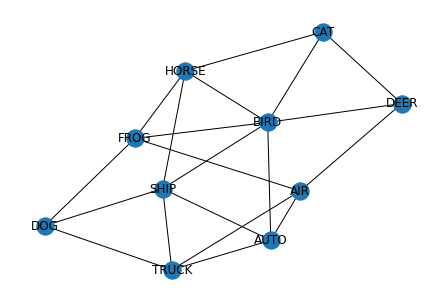

In [30]:
G=nx.Graph()
elist=[('AIR','AUTO',1.0),('AIR','DEER',1.0),('AIR','FROG',1.0),('AIR','TRUCK',1.0),
       ('AUTO','BIRD',1.0),('AUTO','TRUCK',1.0),('AUTO','SHIP',1.0),
       ('BIRD','CAT',1.0),('BIRD','DEER',1.0),('BIRD','FROG',1.0),('BIRD','HORSE',1.0),('BIRD','SHIP',1.0),
       ('CAT','DEER',1.0),('CAT','HORSE',1.0),
       ('DOG','FROG',1.0),('DOG','SHIP',1.0),('DOG','TRUCK',1.0),
       ('FROG','HORSE',1.0),
       ('HORSE','SHIP',1.0),
       ('SHIP','TRUCK',1.0)]
G.add_weighted_edges_from(elist)
nx.draw(G, with_labels=True)